## Application of Data Mining practices 


In [1]:
## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import gcf
import seaborn as sns
sns.set()#define the theme
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from statistics import mean

#### Investigating the data set

In [3]:
# read the data set
df=pd.read_csv("fundamentals.csv")
df.head(5)

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  \
0         -1.888000e+09     4.695000e+09        53.0   
1         -3.114000e+09     1.059200e+10        75.0   
2         -5.311000e+09     1.513500e+10        60.0   
3         -6.151000e+09     1.159100e+10        51.0   
4         -2.711820e+08     5.202150e+08        23.0   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               1.330000e+09                     0.0    127000000.0   
1               2.175000e+09                     0.0      5000000.0   
2               1.768000e+09                     0.0      7000000.0   
3               1.085000e+09                     0.0      6000000.0   
4               5.981110e+08            -260298000.0         7000.0   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0     1.049900e+10           78.0            0.000000e+00   
1     1.101900e+10          104.0            0.000000e+00   
2     1.562000e+10           88.0            0.000000e+00   
3     1.109600e+10           73.0            2.477000e+09   
4     3.106967e+09          124.0            0.000000e+00   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                 223000000.0  1.001000e+09                     -1.813000e+09   
1                 935000000.0  1.020000e+09                     -1.324000e+09   
2                 829000000.0  1.342000e+09                      4.099000e+09   
3                 667000000.0  1.487000e+09                      5.496000e+09   
4                         0.0  1.895440e+08                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -2.445000e+09                      0.0   
1        -2.180000e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.616000e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets      Goodwill  \
0                                             0.0  1.340200e+10  0.000000e+00   
1                                             0.0  1.925900e+10  4.086000e+09   
2                                             0.0  2.308400e+10  4.091000e+09   
3                                             0.0  2.751000e+10  4.091000e+09   
4                                             0.0  1.292547e+09  7.638900e+07   

   Gross Margin  Gross Profit    Income Tax  Intangible Assets  \
0          58.0  1.435600e+10 -5.690000e+08       8.690000e+08   
1          59.0  1.572400e+10 -3.460000e+08       2.311000e+09   
2          63.0  2.703000e+10  3.300000e+08       2.240000e+09   
3          73.0  2.989400e+10 -2.994000e+09       2.249000e+09   
4          50.0  3.098036e+09  2.364040e+08       2.884500e+07   

   Interest Expense     Inventory   Investments   Liabilities  Long-Term Debt  \
0       632000000.0  5.800000e+08  3.060000e+08  4.730000e+08    7.116000e+09   
1       856000000.0  1.012000e+09 -1.181000e+09 -2.350000e+08    1.535300e+10   
2       887000000.0  1.004000e+09  1.799000e+09 -1.026000e+09    1.604300e+10   
3       880000000.0  8.630000e+08  4.430000e+08 -6.330000e+08    1.833000e+1

Data set consists bwith some financial related variables

In [4]:
#dropping the first column
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0           AAL    2012-12-31      3.068000e+09         -222000000.0   
1           AAL    2013-12-31      4.975000e+09          -93000000.0   
2           AAL    2014-12-31      4.668000e+09         -160000000.0   
3           AAL    2015-12-31      5.102000e+09          352000000.0   
4           AAP    2012-12-29      2.409453e+09          -89482000.0   

   Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0               -1.961000e+09           23.0         -1.888000e+09   
1               -2.723000e+09           67.0         -3.114000e+09   
2               -1.500000e+08          143.0         -5.311000e+09   
3               -7.080000e+08          135.0         -6.151000e+09   
4                6.000000e+05           32.0         -2.711820e+08   

   Capital Surplus  Cash Ratio  Cash and Cash Equivalents  \
0     4.695000e+09        53.0               1.330000e+09   
1     1.059200e+10        75.0               2.175000e+09   
2     1.513500e+10        60.0               1.768000e+09   
3     1.159100e+10        51.0               1.085000e+09   
4     5.202150e+08        23.0               5.981110e+08   

   Changes in Inventories  Common Stocks  Cost of Revenue  Current Ratio  \
0                     0.0    127000000.0     1.049900e+10           78.0   
1                     0.0      5000000.0     1.101900e+10          104.0   
2                     0.0      7000000.0     1.562000e+10           88.0   
3                     0.0      6000000.0     1.109600e+10           73.0   
4            -260298000.0         7000.0     3.106967e+09          124.0   

   Deferred Asset Charges  Deferred Liability Charges  Depreciation  \
0            0.000000e+00                 223000000.0  1.001000e+09   
1            0.000000e+00                 935000000.0  1.020000e+09   
2            0.000000e+00                 829000000.0  1.342000e+09   
3            2.477000e+09                 667000000.0  1.487000e+09   
4            0.000000e+00                         0.0  1.895440e+08   

   Earnings Before Interest and Tax  Earnings Before Tax  \
0                     -1.813000e+09        -2.445000e+09   
1                     -1.324000e+09        -2.180000e+09   
2                      4.099000e+09         3.212000e+09   
3                      5.496000e+09         4.616000e+09   
4                      6.579150e+08         6.240740e+08   

   Effect of Exchange Rate  Equity Earnings/Loss Unconsolidated Subsidiary  \
0                      0.0                                             0.0   
1                      0.0                                             0.0   
2                      0.0                                             0.0   
3                      0.0                                             0.0   
4                      0.0                                             0.0   

   Fixed Assets      Goodwill  Gross Margin  Gross Profit    Income Tax  \
0  1.340200e+10  0.000000e+00          58.0  1.435600e+10 -5.690000e+08   
1  1.925900e+10  4.086000e+09          59.0  1.572400e+10 -3.460000e+08   
2  2.308400e+10  4.091000e+09          63.0  2.703000e+10  3.300000e+08   
3  2.751000e+10  4.091000e+09          73.0  2.989400e+10 -2.994000e+09   
4  1.292547e+09  7.638900e+07          50.0  3.098036e+09  2.364040e+08   

   Intangible Assets  Interest Expense     Inventory   Investments  \
0       8.690000e+08       632000000.0  5.800000e+08  3.060000e+08   
1       2.311000e+09       856000000.0  1.012000e+09 -1.181000e+09   
2       2.240000e+09       887000000.0  1.004000e+09  1.799000e+09   
3       2.249000e+09       880000000.0  8.630000e+08  4.430000e+08   
4       2.884500e+07        33841000.0  2.308609e+09  0.000000e+00   

    Liabilities  Long-Term Debt  Long-Term Investments  Minority Interest  \
0  4.730000e+08    7.116000e+09                    0.0                0.0   
1 -2.350000e+08    1.535300e+10          

In [5]:
# shape of the dataset
df.shape

(1781, 78)

In [6]:
# data types of the varaibles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [7]:
# Checking the count of years
df['For Year'].value_counts()

2014.0    428
2013.0    425
2015.0    425
2012.0    244
2016.0     85
1215.0      1
Name: For Year, dtype: int64

In [8]:
df = df[df["For Year"] != 1215]

* An unusual value is examined in the For Year varible. That row is dropped before using the dataset for the analysis.

In [9]:
# cheking the number of categories in the Ticker symbol
df['Ticker Symbol'].value_counts()

PPL     4
STX     4
AMT     4
DNB     4
COL     4
       ..
IPG     3
QRVO    3
AVGO    2
MYL     2
CSRA    2
Name: Ticker Symbol, Length: 448, dtype: int64

* 360 categories are available in the Ticker symbol variable

In [10]:
# final shape of the dataframe
df.shape

(1780, 78)

### Handling the Missing values

In [11]:
## Identifyung the columns with missing values 
df.columns[df.isnull().any()]

Index(['Cash Ratio', 'Current Ratio', 'Quick Ratio', 'For Year',
       'Earnings Per Share', 'Estimated Shares Outstanding'],
      dtype='object')

* Out of the available 78 columns, above six columns are having missing values

In [12]:
# taking the percentage of missing values
df[['Cash Ratio', 'Current Ratio', 'Quick Ratio', 'For Year',
       'Earnings Per Share', 'Estimated Shares Outstanding']].isna().sum()/len(df)*100 # missing as a propotion

Cash Ratio                      16.797753
Current Ratio                   16.797753
Quick Ratio                     16.797753
For Year                         9.719101
Earnings Per Share              12.303371
Estimated Shares Outstanding    12.303371
dtype: float64

* According to the missing value percentages, Cash, Quick and Current Ratio varaibles are having 16.79% of missing values. Earning Per share and Estimated shares outstanding varaibles have 12.29% of missing values.
* It is decided to drop these missing values. The reason is, values in these columns are applicable for a respective year and a Ticker symbol. Hence imputing missing values with mean or median of the respective column would not address the change according to the year.
* Hence the missing values in those 4 columns are dropped.

In [13]:
# Dropping the missing values
df.dropna(subset = ['Cash Ratio', 'Current Ratio', 'Quick Ratio','Earnings Per Share',
                    'Estimated Shares Outstanding'], inplace=True)

In [14]:
# re- checking the missing propotion
df[['Cash Ratio', 'Current Ratio', 'Quick Ratio', 'For Year',
       'Earnings Per Share', 'Estimated Shares Outstanding']].isna().sum()/len(df)*100 # missing as a propotion

Cash Ratio                      0.0
Current Ratio                   0.0
Quick Ratio                     0.0
For Year                        0.0
Earnings Per Share              0.0
Estimated Shares Outstanding    0.0
dtype: float64

* Missing values in for Year varaible also automattically dropped when dropping the missing valuesin the other 4 columns.

In [15]:
df.shape

(1298, 78)

* This is the shape of the dataframe after dropping the missing values

### Handling the Outliers

In [16]:
# selecting only the numerical varaibles
df_copy = df.loc[:, ~ df.columns.isin(['Ticker Symbol','Period Ending','For Year'])]
df_copy.head(3)

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0      3.068000e+09         -222000000.0               -1.961000e+09   
1      4.975000e+09          -93000000.0               -2.723000e+09   
2      4.668000e+09         -160000000.0               -1.500000e+08   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0           23.0         -1.888000e+09     4.695000e+09        53.0   
1           67.0         -3.114000e+09     1.059200e+10        75.0   
2          143.0         -5.311000e+09     1.513500e+10        60.0   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               1.330000e+09                     0.0    127000000.0   
1               2.175000e+09                     0.0      5000000.0   
2               1.768000e+09                     0.0      7000000.0   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0     1.049900e+10           78.0                     0.0   
1     1.101900e+10          104.0                     0.0   
2     1.562000e+10           88.0                     0.0   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                 223000000.0  1.001000e+09                     -1.813000e+09   
1                 935000000.0  1.020000e+09                     -1.324000e+09   
2                 829000000.0  1.342000e+09                      4.099000e+09   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -2.445000e+09                      0.0   
1        -2.180000e+09                      0.0   
2         3.212000e+09                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets      Goodwill  \
0                                             0.0  1.340200e+10  0.000000e+00   
1                                             0.0  1.925900e+10  4.086000e+09   
2                                             0.0  2.308400e+10  4.091000e+09   

   Gross Margin  Gross Profit   Income Tax  Intangible Assets  \
0          58.0  1.435600e+10 -569000000.0       8.690000e+08   
1          59.0  1.572400e+10 -346000000.0       2.311000e+09   
2          63.0  2.703000e+10  330000000.0       2.240000e+09   

   Interest Expense     Inventory   Investments   Liabilities  Long-Term Debt  \
0       632000000.0  5.800000e+08  3.060000e+08  4.730000e+08    7.116000e+09   
1       856000000.0  1.012000e+09 -1.181000e+09 -2.350000e+08    1.535300e+10   
2       887000000.0  1.004000e+09  1.799000e+09 -1.026000e+09    1.604300e+10   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0                    0.0                0.0           0.0   -1.020000e+09   
1                    0.0                0.0           0.0    2.208000e+09   
2                    0.0                0.0           0.0    1.700000e+08   

   Net Cash Flow  Net Cash Flow-Operating  Net Cash Flows-Financing  \
0    197000000.0             1.285000e+09              4.830000e+08   
1    660000000.0             6.750000e+08              3.799000e+09   
2   -146000000.0             3.080000e+09             -3.150000e+08   

   Net Cash Flows-Investing    Net Income  Net Income Adjustments  \
0             -1.571000e+09 -1.876000e+09            2.050000e+09   
1             -3.814000e+09 -1.834000e+09            1.873000e+09   
2             -2.911000e+09  2.882000e+09            5.420000e+08   

   Net Income Applicable to Common Shareholders  Net Income-Cont. Operations  \
0                                 -1.876000e+09                -4.084000e+09   
1                                 -1.834000e+09                -4.489000e+09   
2                                  2.882000e+09                 2.882000e+09   

   Net Receivables  Non-Recurring Items  Operating Income  Operating Margin  \
0     1.124000e+09          386000000.0      1.480000e+08               1.0   
1     1.560000e+09          559000000.0      1.399000e+09               5.0   
2     1.771000e+09          8

In [17]:
# taking a list of column names
column_update_list = df_copy.columns.to_numpy()

#### Before handling the outliers

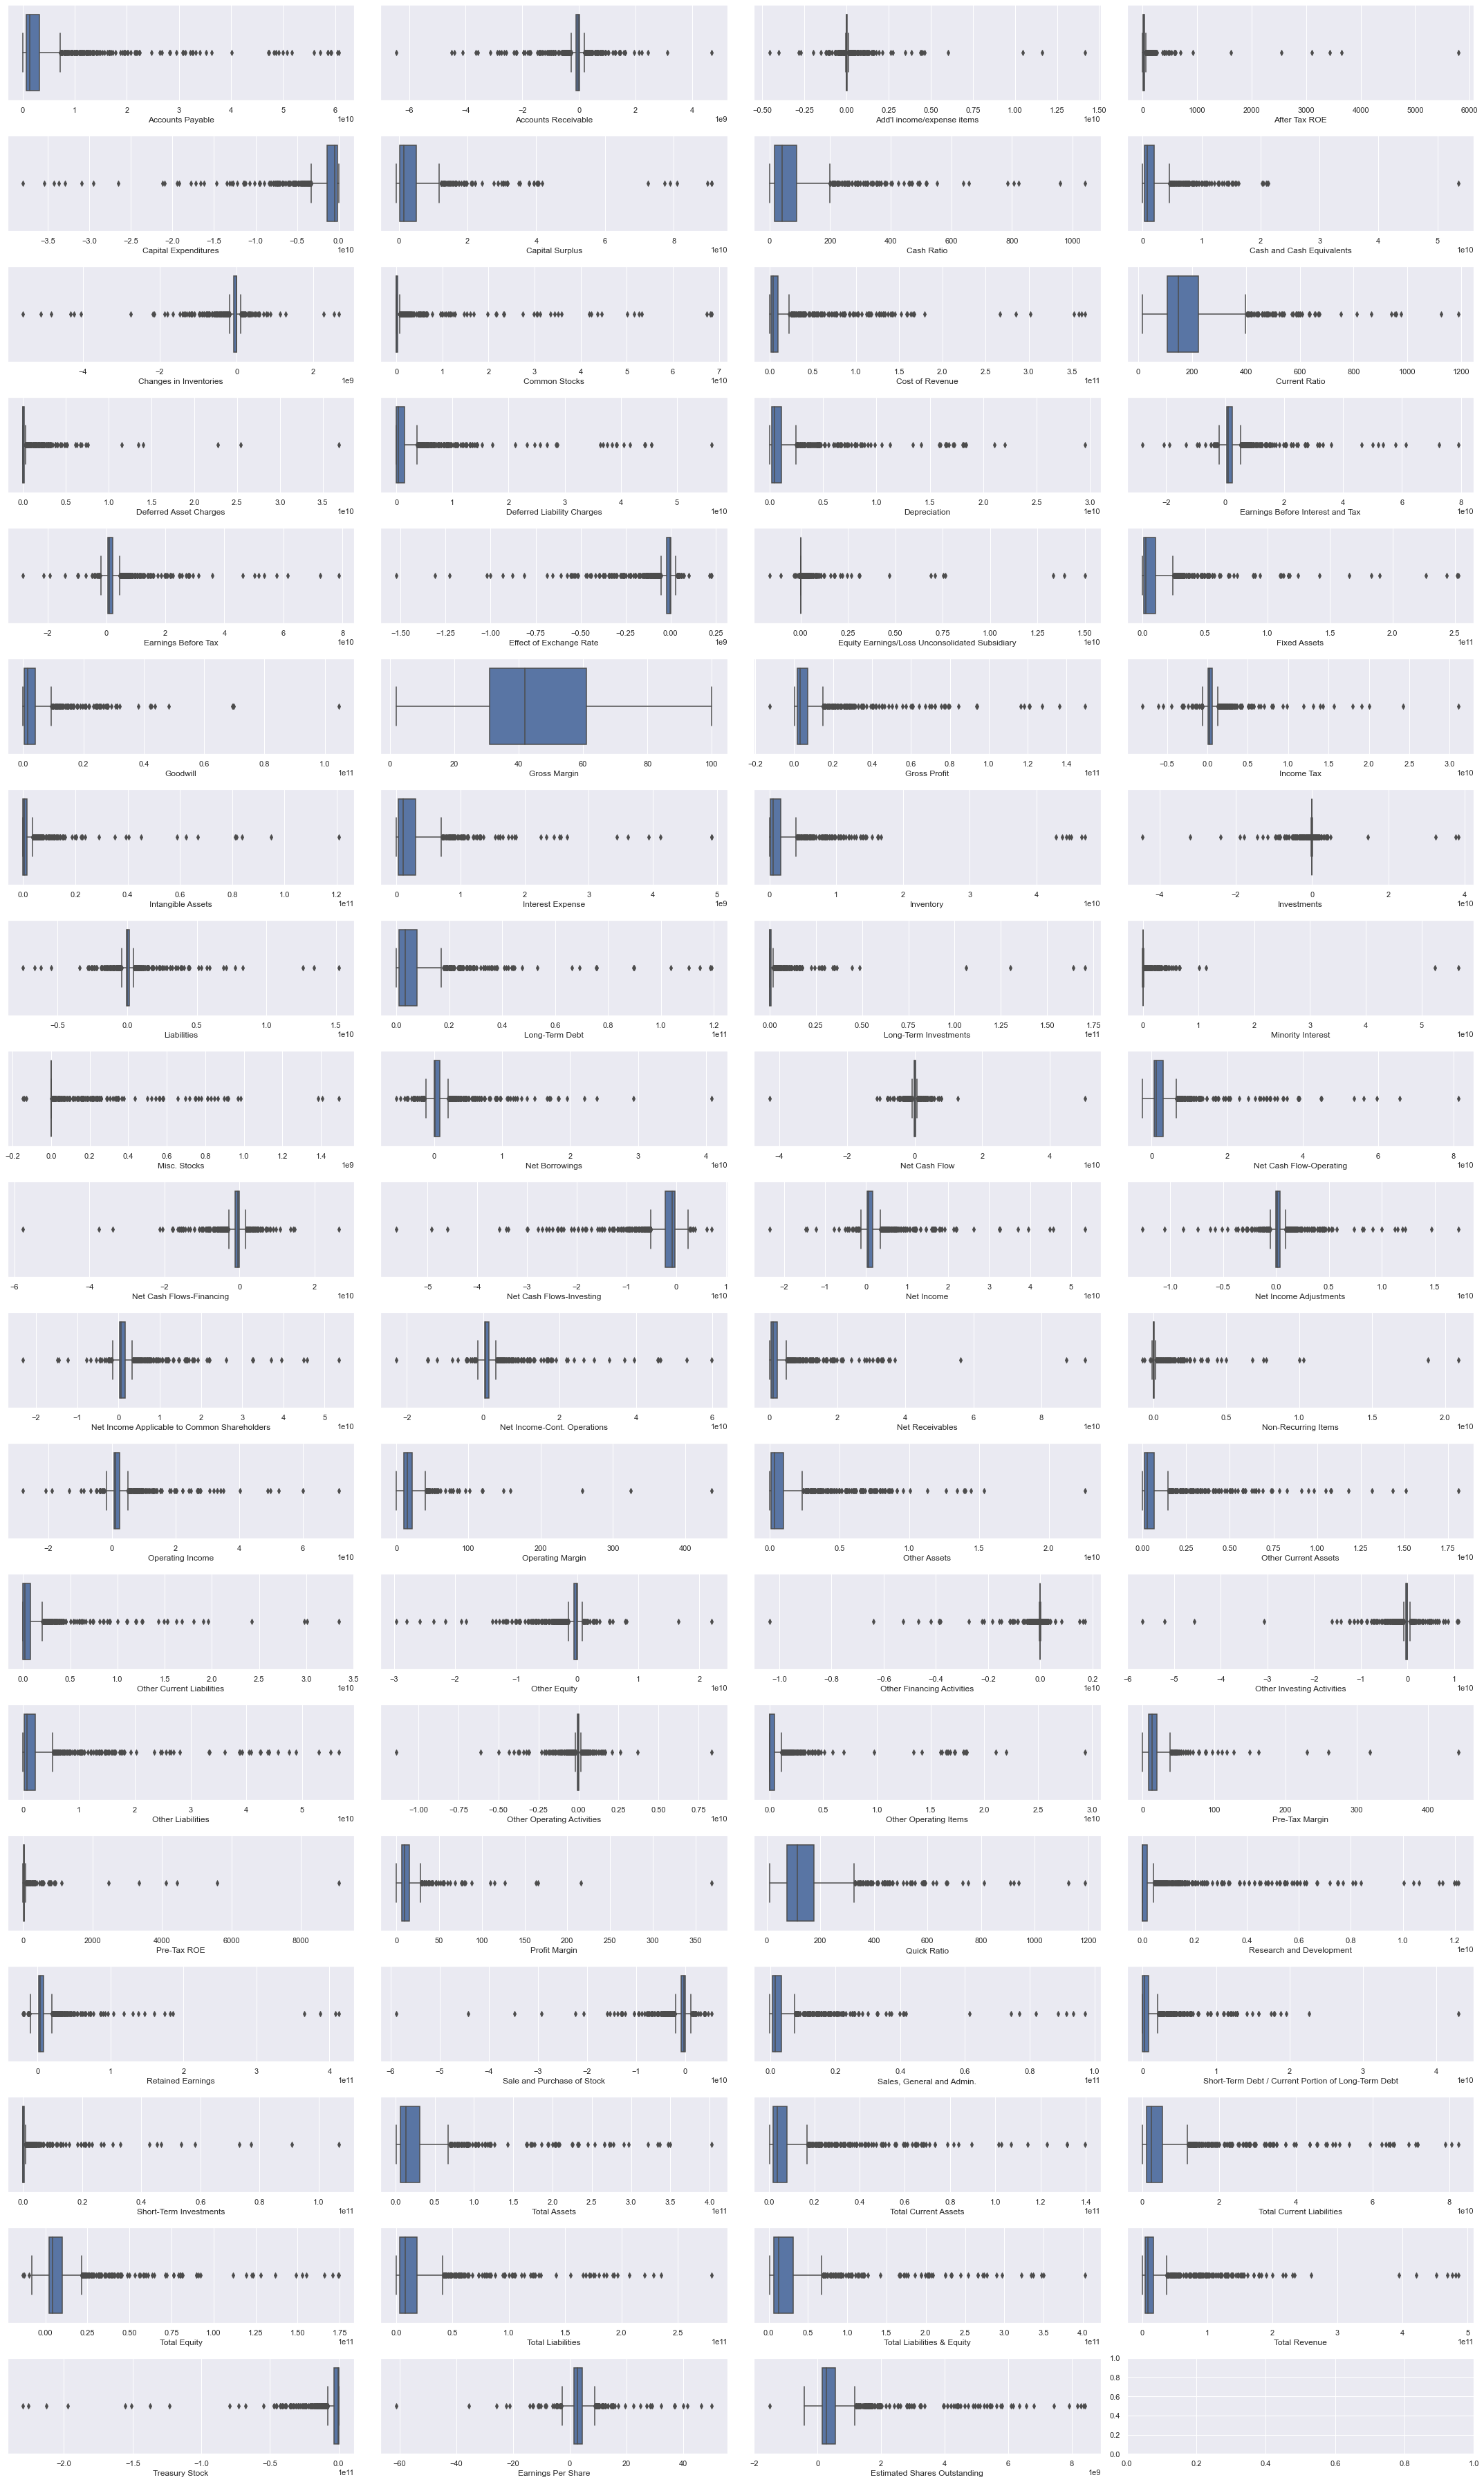

In [18]:
# Visualizing the outliers 
dim = (30, 50)
def fun_plot(df_k):
    fig, axes = plt.subplots(19, 4,figsize=dim)
    y=0
    for column_name in column_update_list:
        i, j = divmod(y, 4)
        sns.boxplot(x= df_k[column_name],  ax=axes[i,j]) 
        y = y+1
    plt.tight_layout()
    plt.show()

fun_plot(df)

* Most of the variables are having outliers.

#### After Handling the outliers 

In [19]:
# Adjusting the values according to the ul and ll
df_copy_2 = df_copy.copy()
col = df_copy.columns
for i in range(len(col)):
    q1 = df_copy_2[col[i]].quantile(0.25)
    q3 = df_copy_2[col[i]].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr
    
#     print("ll = ", ll , "ul = ", ul)
    df_copy_2[col[i]] = np.where(df_copy_2[col[i]] > ul,ul,df_copy_2[col[i]])
    df_copy_2[col[i]] = np.where(df_copy_2[col[i]] < ll,ll,df_copy_2[col[i]])

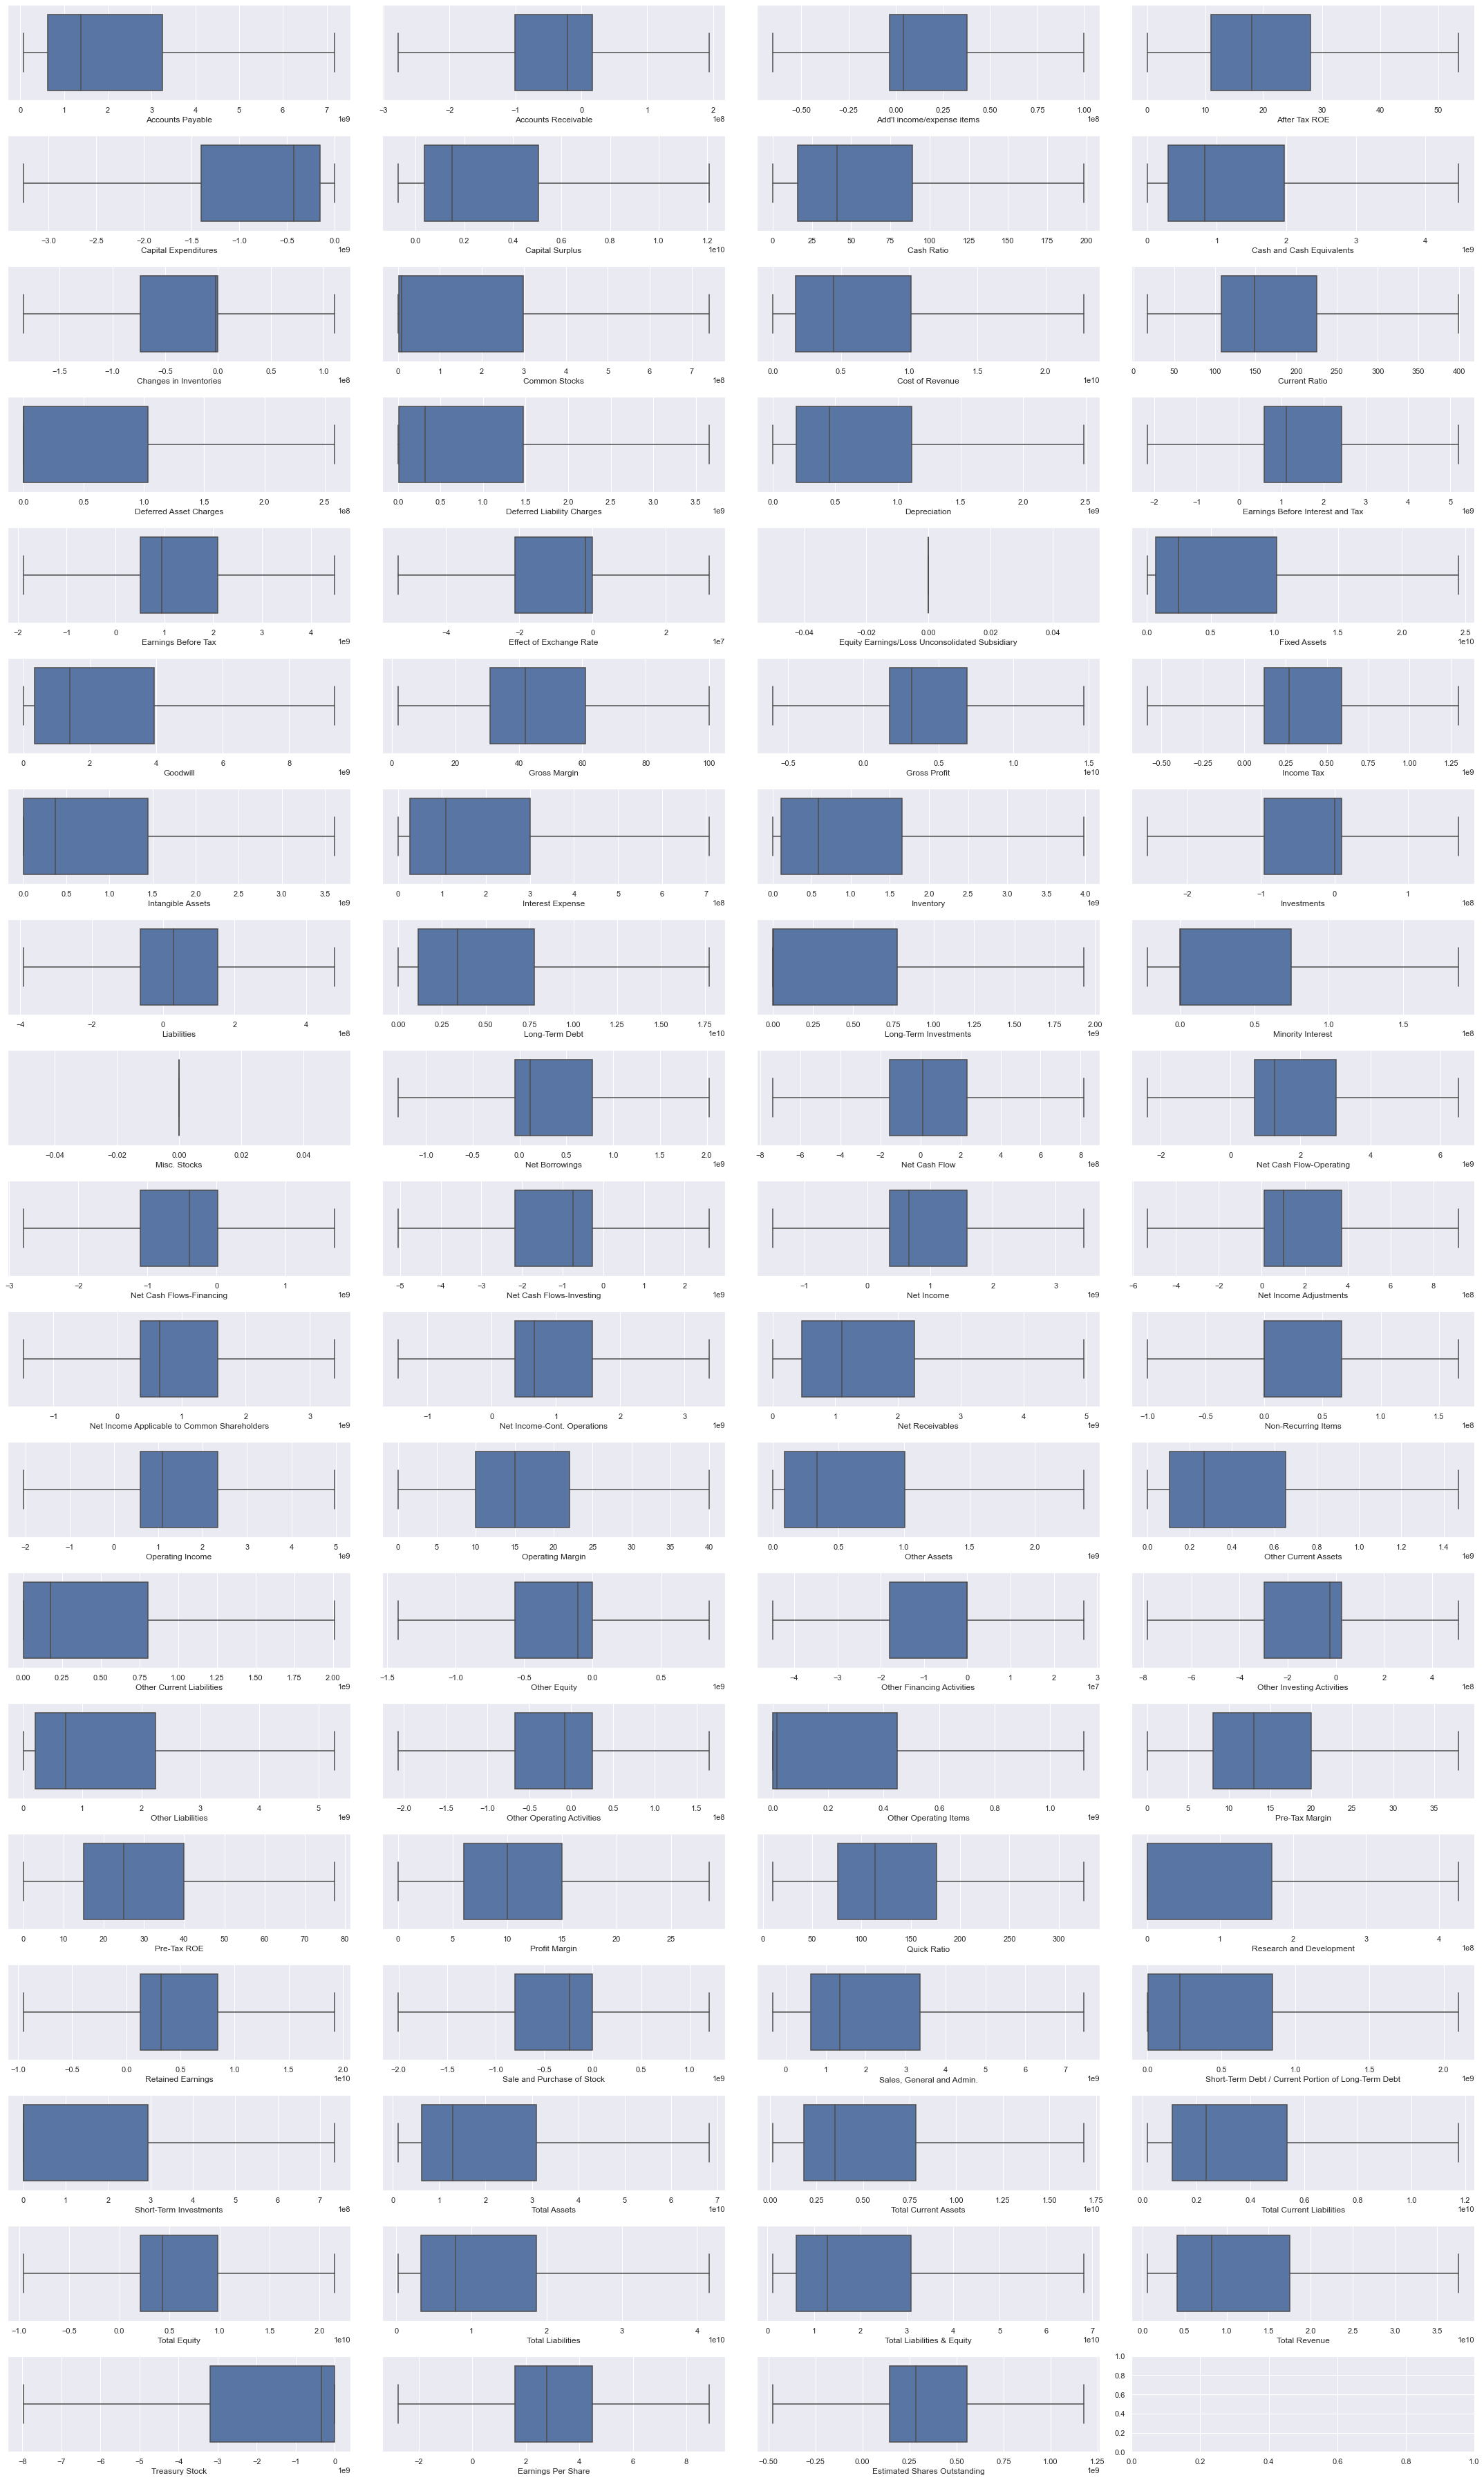

In [20]:
# After handling outliers
col_names = list(df_copy_2.columns)
dims = (30, 50)
f, axes = plt.subplots(nrows=19, ncols=4, figsize=dims)  
y = 0;
for name in col_names:
    i, j = divmod(y, 4)
    sns.boxplot(x=df_copy_2[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()

* No outliers are visualized after handling the outliers.

#### obtaining qq plots of the features

Accounts Payable


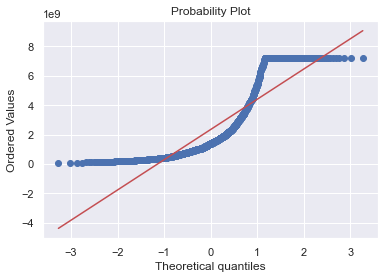

Accounts Receivable


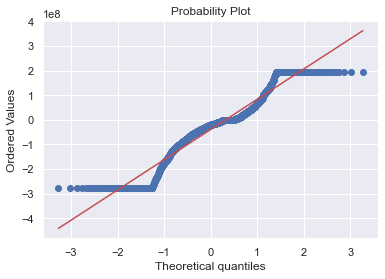

Add'l income/expense items


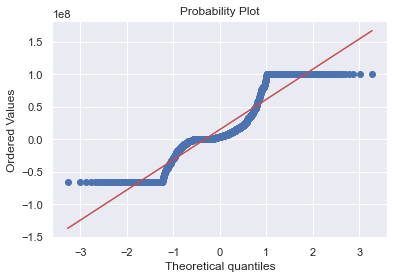

After Tax ROE


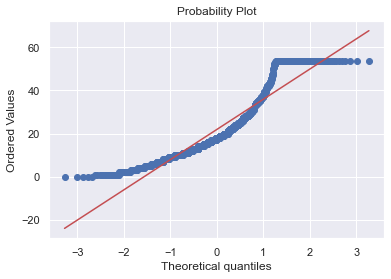

Capital Expenditures


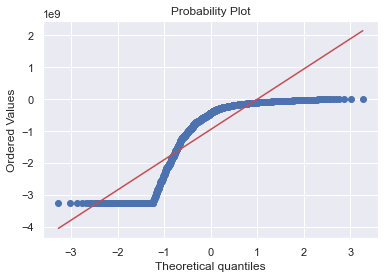

Capital Surplus


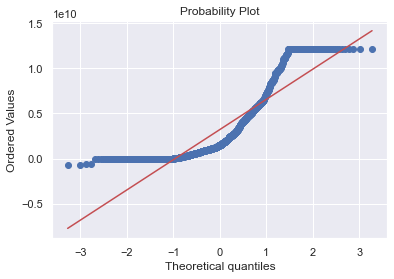

Cash Ratio


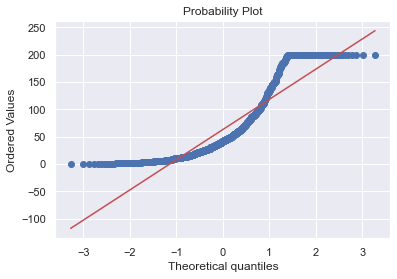

Cash and Cash Equivalents


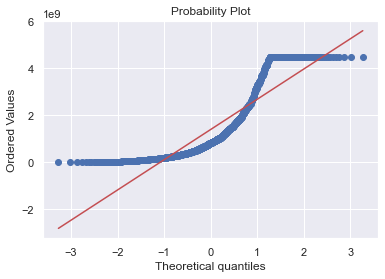

Changes in Inventories


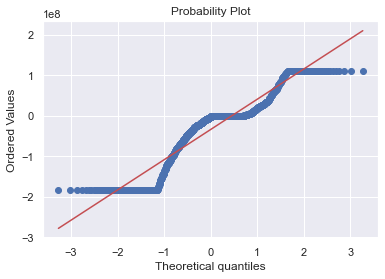

Common Stocks


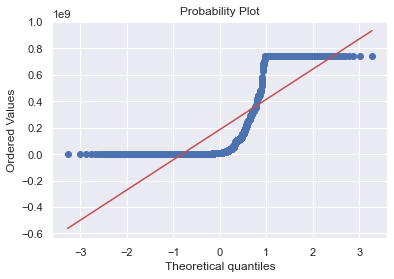

Cost of Revenue


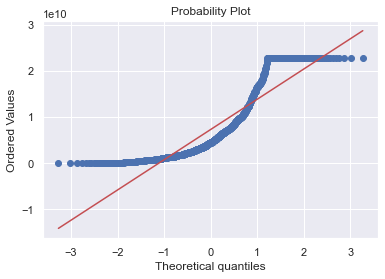

Current Ratio


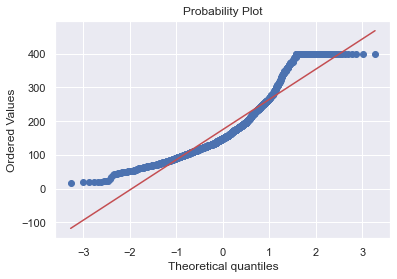

Deferred Asset Charges


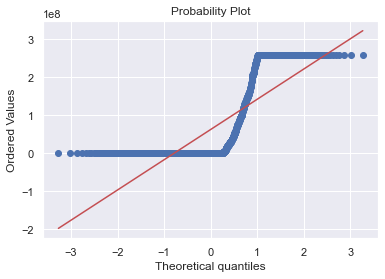

Deferred Liability Charges


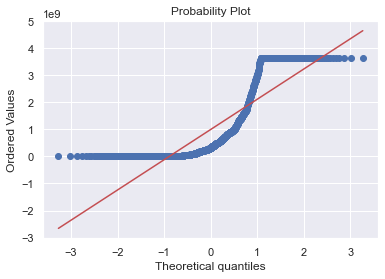

Depreciation


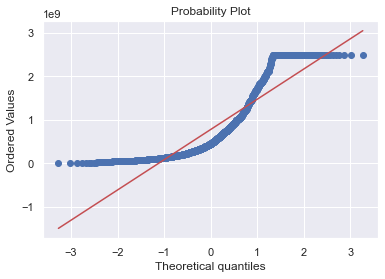

Earnings Before Interest and Tax


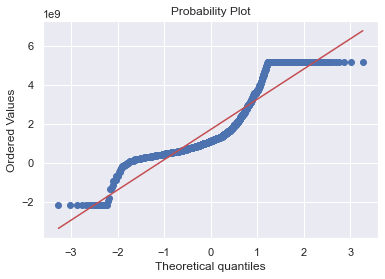

Earnings Before Tax


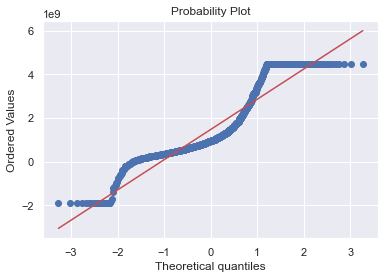

Effect of Exchange Rate


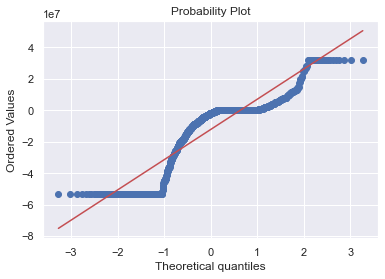

Equity Earnings/Loss Unconsolidated Subsidiary


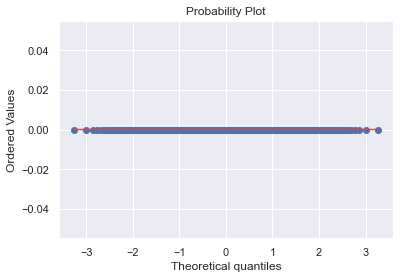

Fixed Assets


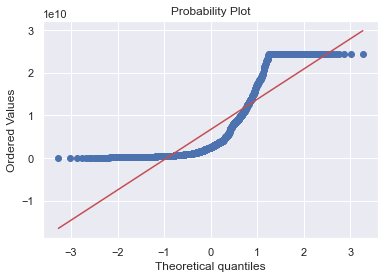

Goodwill


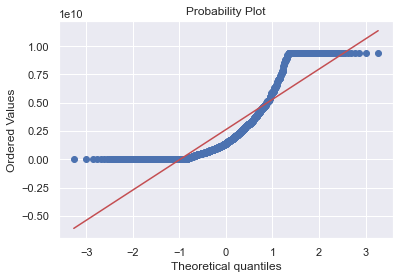

Gross Margin


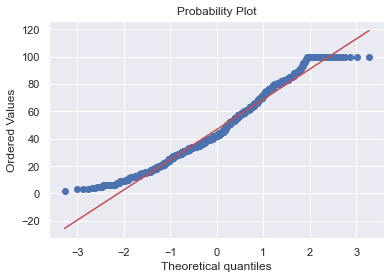

Gross Profit


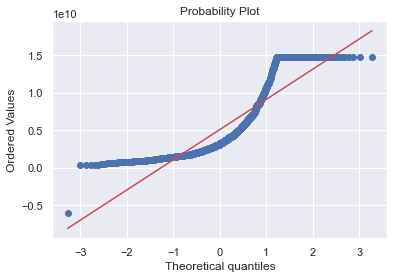

Income Tax


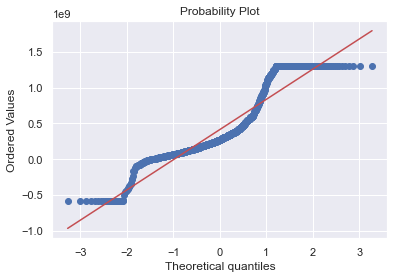

Intangible Assets


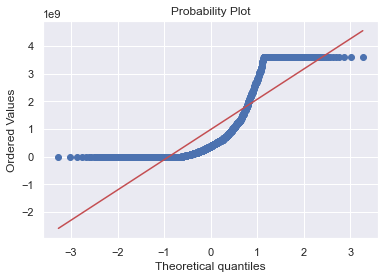

Interest Expense


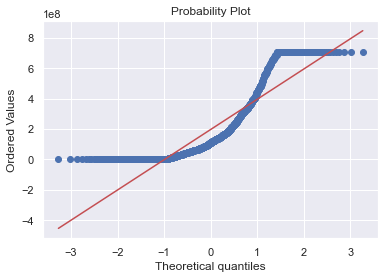

Inventory


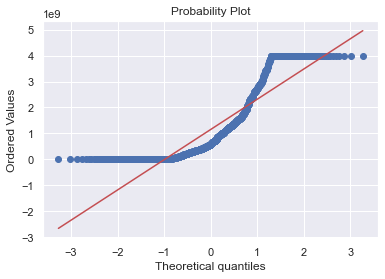

Investments


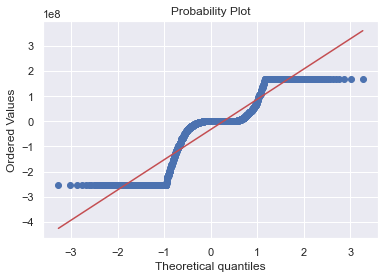

Liabilities


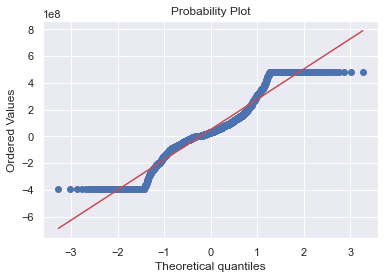

Long-Term Debt


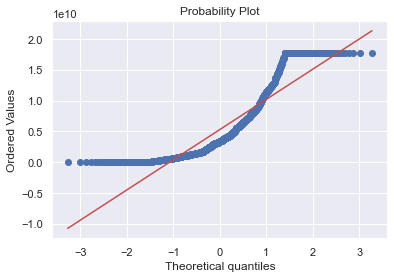

Long-Term Investments


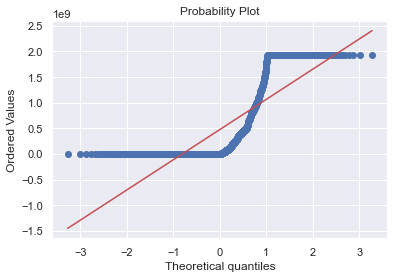

Minority Interest


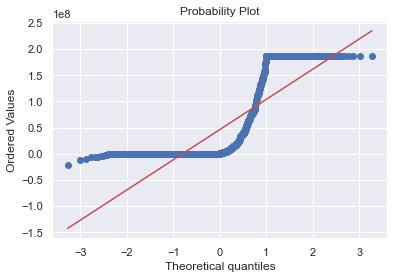

Misc. Stocks


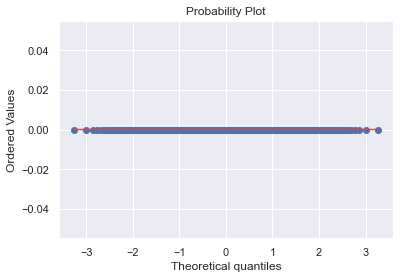

Net Borrowings


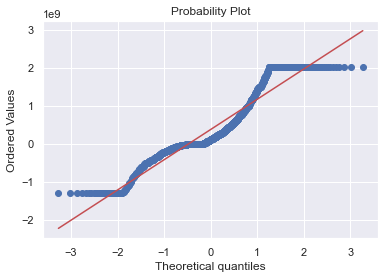

Net Cash Flow


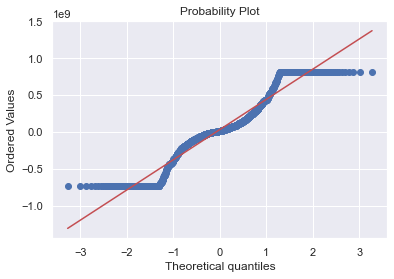

Net Cash Flow-Operating


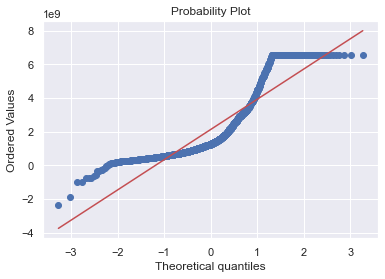

Net Cash Flows-Financing


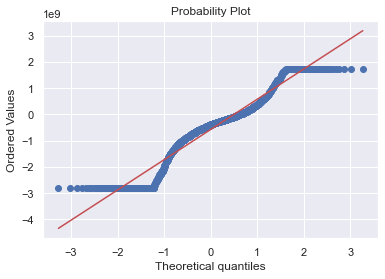

Net Cash Flows-Investing


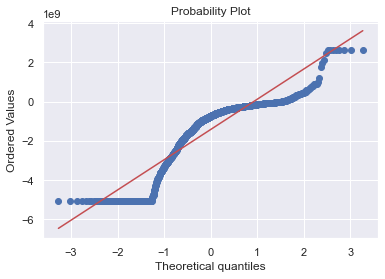

Net Income


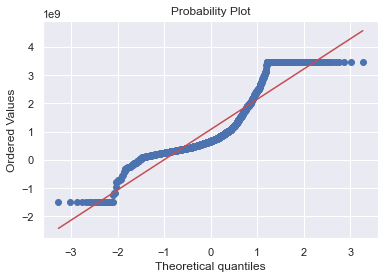

Net Income Adjustments


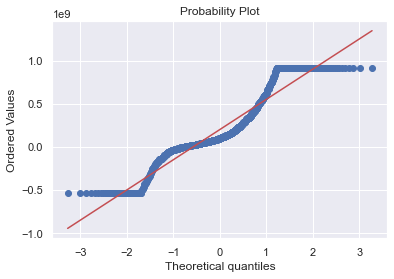

Net Income Applicable to Common Shareholders


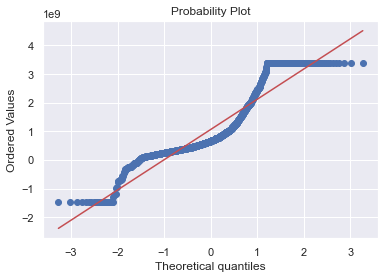

Net Income-Cont. Operations


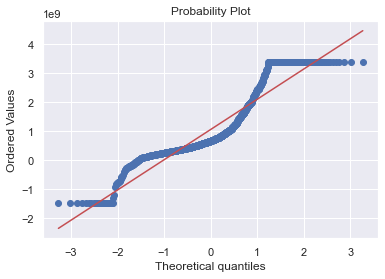

Net Receivables


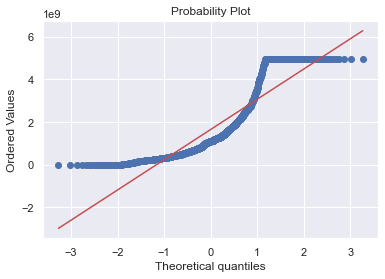

Non-Recurring Items


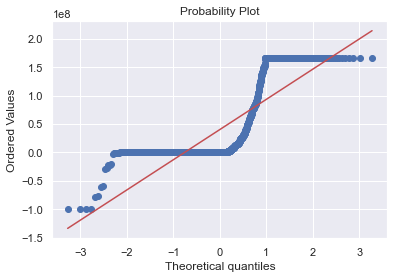

Operating Income


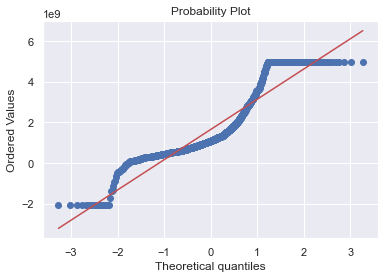

Operating Margin


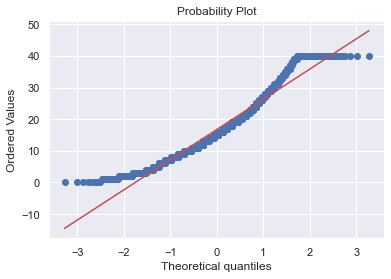

Other Assets


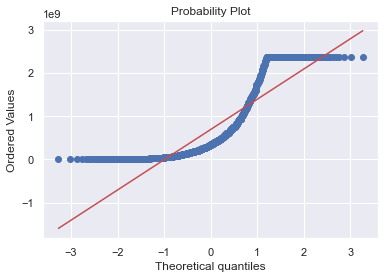

Other Current Assets


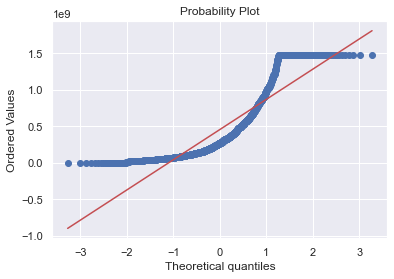

Other Current Liabilities


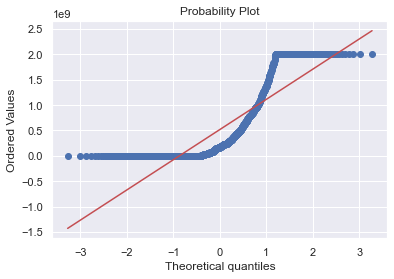

Other Equity


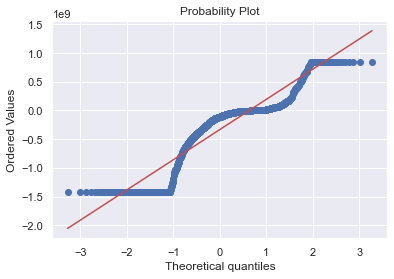

Other Financing Activities


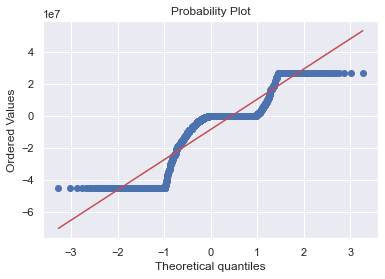

Other Investing Activities


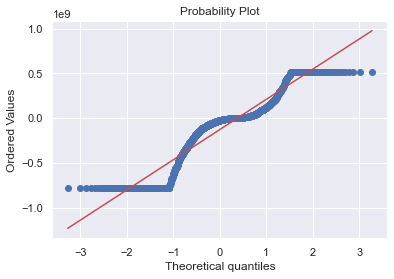

Other Liabilities


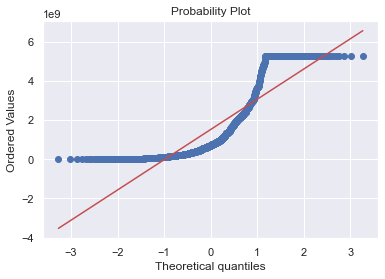

Other Operating Activities


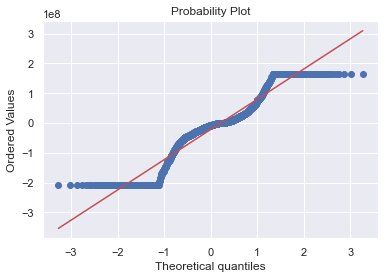

Other Operating Items


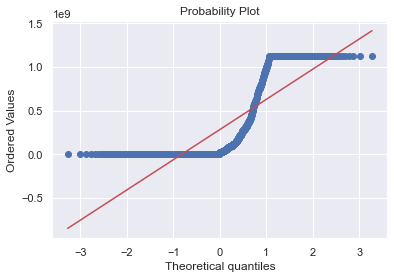

Pre-Tax Margin


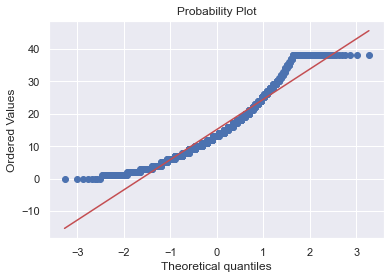

Pre-Tax ROE


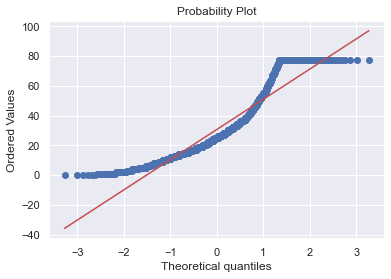

Profit Margin


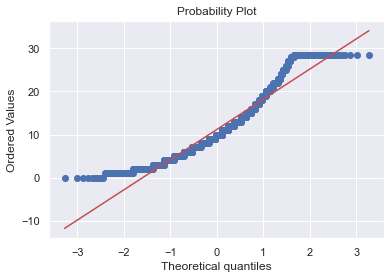

Quick Ratio


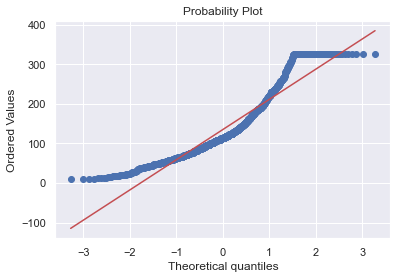

Research and Development


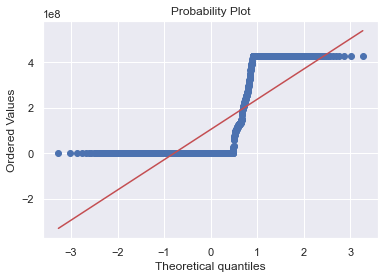

Retained Earnings


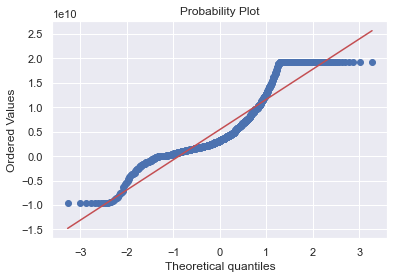

Sale and Purchase of Stock


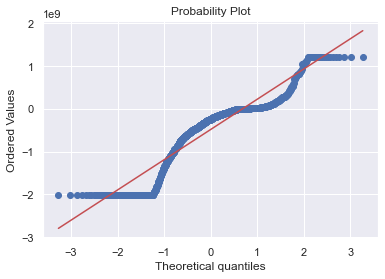

Sales, General and Admin.


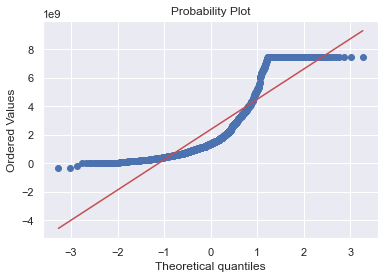

Short-Term Debt / Current Portion of Long-Term Debt


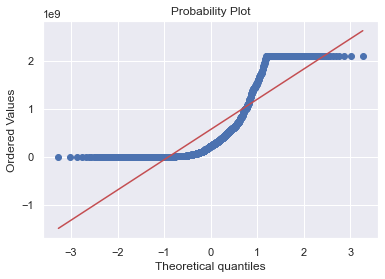

Short-Term Investments


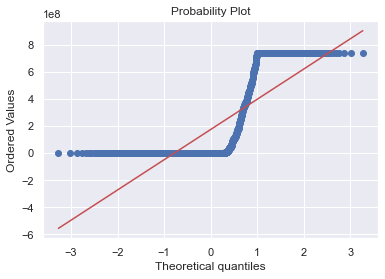

Total Assets


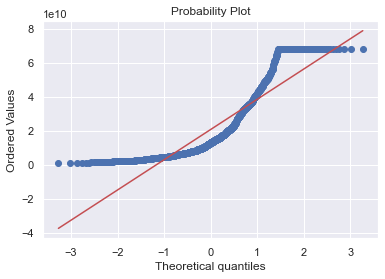

Total Current Assets


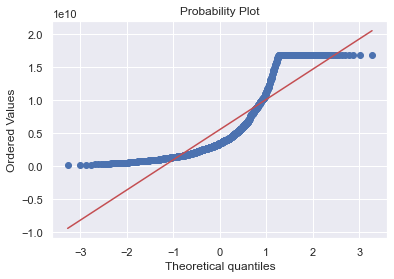

Total Current Liabilities


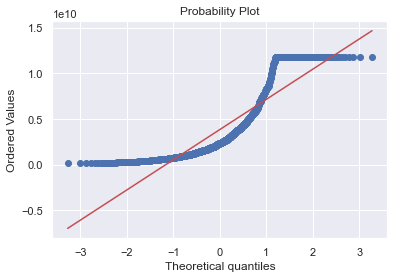

Total Equity


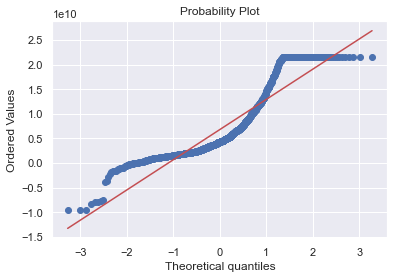

Total Liabilities


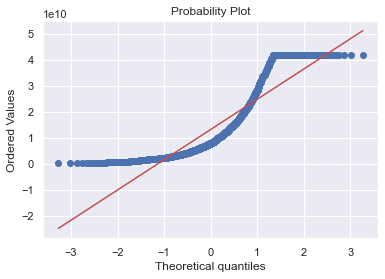

Total Liabilities & Equity


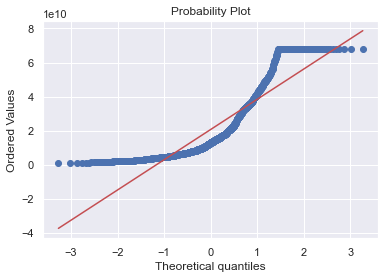

Total Revenue


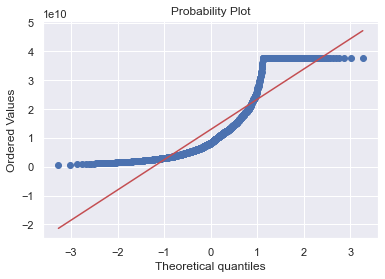

Treasury Stock


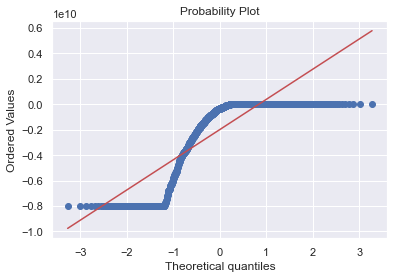

Earnings Per Share


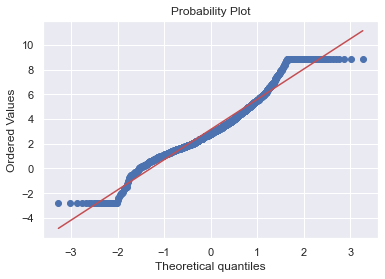

Estimated Shares Outstanding


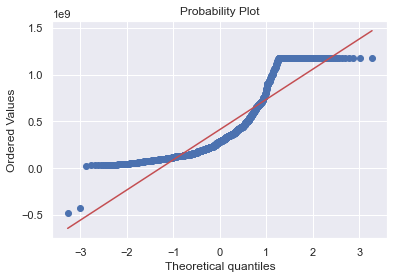

In [21]:
def pp_plot(col_name):
    ## create and show the plot.
    print(name)
    stats.probplot(df_copy_2[col_name], dist="norm", plot=plt)
    plt.show()
    
for name in col_names:
    pp_plot(name)

#### Histograms

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


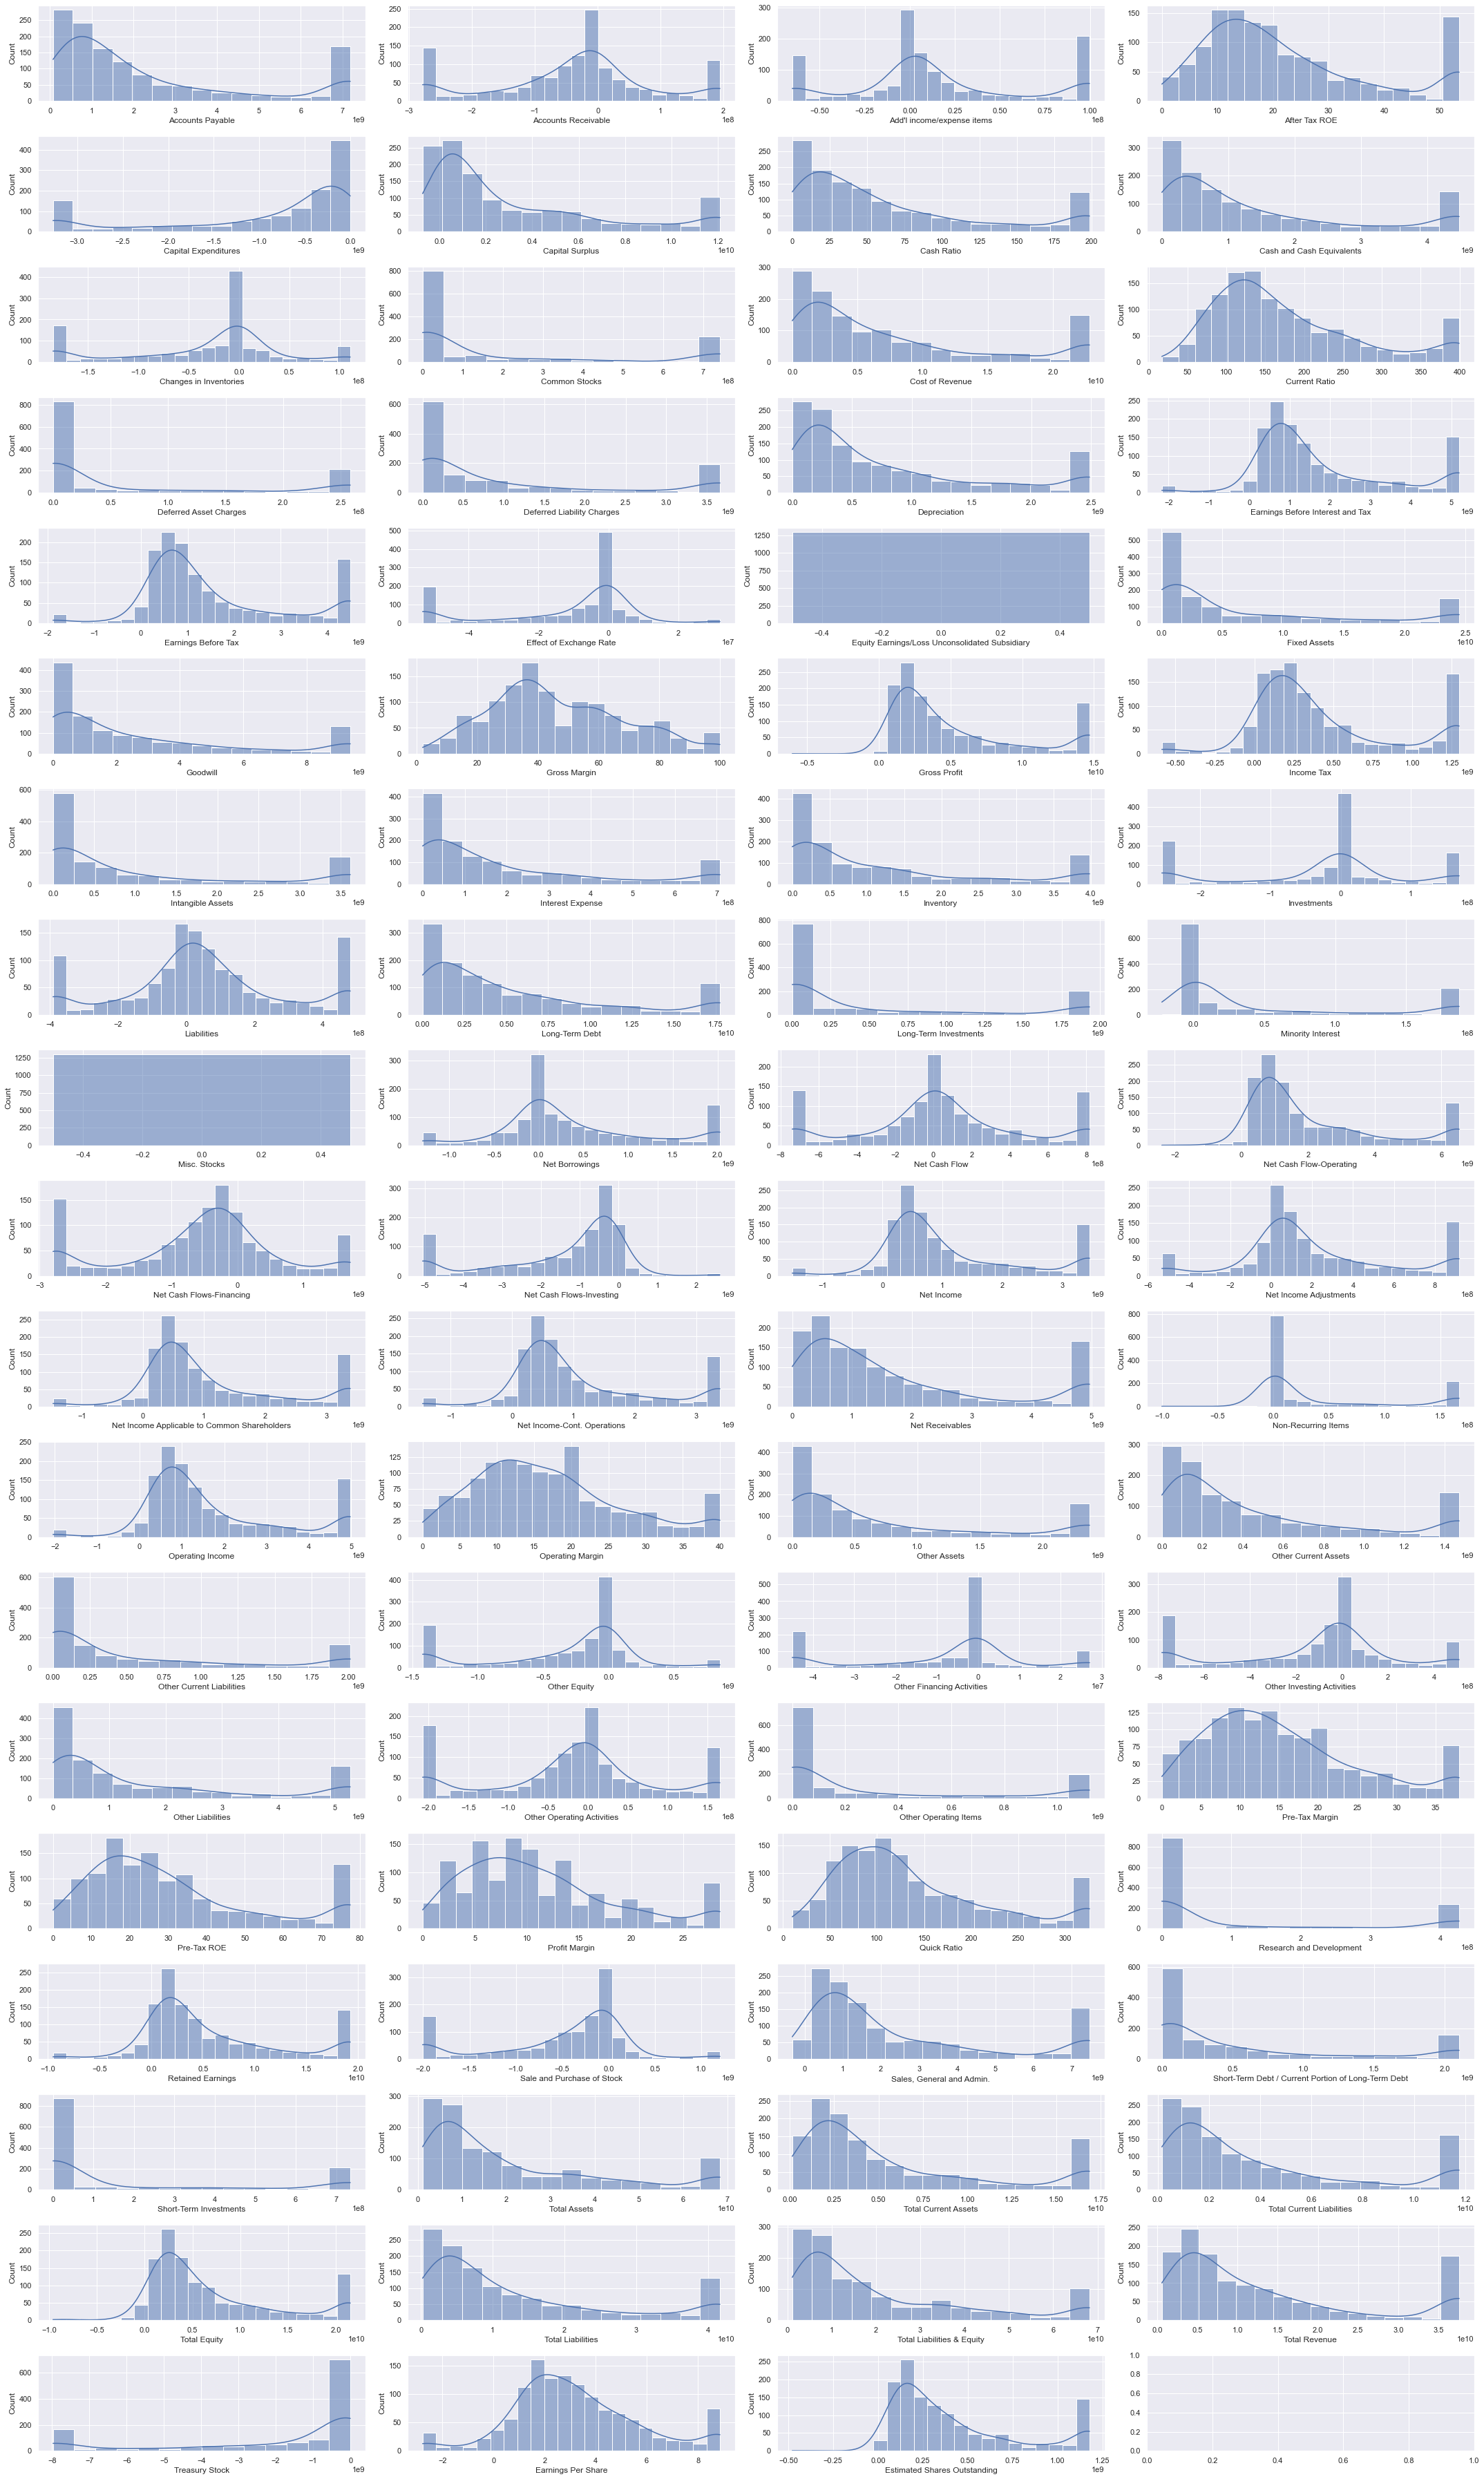

In [22]:
f, axes = plt.subplots(nrows=19, ncols=4, figsize=dims)  
y = 0;
for name in col_names:
    i, j = divmod(y, 4)
    sns.histplot(x=df_copy_2[name], ax=axes[i, j], kde=True)
    y = y + 1

plt.tight_layout()
plt.show()

* Some of the varibles are having skewd distributions. Both left skewed and right skwed distributions can be examined.

#### Transformations of the varibles

* Both the Histograms and the qq plots demonstrates that there are varibles with skewd distributions. Hence then the skewness values of the each variable is examined.

In [23]:
# obtaining the skewness values
skew_values=pd.DataFrame(df_copy_2.skew(axis=0,skipna=True))
skew_values=skew_values.reset_index()
skew_values.rename(columns = {'index':'Column_name',0:'Skew_values'}, inplace = True)
skew_values.head(10)

Column_name  Skew_values
0            Accounts Payable     1.162510
1         Accounts Receivable    -0.215887
2  Add'l income/expense items     0.349647
3               After Tax ROE     0.928832
4        Capital Expenditures    -1.193379
5             Capital Surplus     1.220297
6                  Cash Ratio     1.127048
7   Cash and Cash Equivalents     1.146243
8      Changes in Inventories    -0.565526
9               Common Stocks     1.245798

* If the skewness is greater than 1 or less than -1, those varibles are considered as variables with  high skewnnes. Hence the right skewed and the left skewed varibles are seperated first.


##### Right Skewed Distributions

In [24]:
## filtering out the right skwed columns
right_skew_list=skew_values[skew_values['Skew_values']>1]['Column_name'].to_list()
right_skew_list

['Accounts Payable',
 'Capital Surplus',
 'Cash Ratio',
 'Cash and Cash Equivalents',
 'Common Stocks',
 'Cost of Revenue',
 'Deferred Asset Charges',
 'Deferred Liability Charges',
 'Depreciation',
 'Fixed Assets',
 'Goodwill',
 'Gross Profit',
 'Intangible Assets',
 'Interest Expense',
 'Inventory',
 'Long-Term Debt',
 'Long-Term Investments',
 'Minority Interest',
 'Net Cash Flow-Operating',
 'Net Receivables',
 'Non-Recurring Items',
 'Other Assets',
 'Other Current Assets',
 'Other Current Liabilities',
 'Other Liabilities',
 'Other Operating Items',
 'Research and Development',
 'Sales, General and Admin.',
 'Short-Term Debt / Current Portion of Long-Term Debt',
 'Short-Term Investments',
 'Total Assets',
 'Total Current Assets',
 'Total Current Liabilities',
 'Total Equity',
 'Total Liabilities',
 'Total Liabilities & Equity',
 'Total Revenue',
 'Estimated Shares Outstanding']

* Above varibles are having a right skwed distributions.

* Out of these varibles, varibles that are having only positive values including the 0 are filtered first. for those varibles sqrt transformation is applied.
* For the variables, which are having negative values , Yeo Johnsan transformation is applied.

In [25]:
# Right skwed 0 included positive variables
right_skew_list_0_included_positive=list()
for col in right_skew_list:
    if (df_copy_2[col].min()>=0):
        right_skew_list_0_included_positive.append(col)

right_skew_list_0_included_positive

['Accounts Payable',
 'Cash Ratio',
 'Cash and Cash Equivalents',
 'Common Stocks',
 'Cost of Revenue',
 'Deferred Asset Charges',
 'Deferred Liability Charges',
 'Depreciation',
 'Fixed Assets',
 'Goodwill',
 'Intangible Assets',
 'Interest Expense',
 'Inventory',
 'Long-Term Debt',
 'Long-Term Investments',
 'Net Receivables',
 'Other Assets',
 'Other Current Assets',
 'Other Current Liabilities',
 'Other Liabilities',
 'Other Operating Items',
 'Research and Development',
 'Short-Term Debt / Current Portion of Long-Term Debt',
 'Short-Term Investments',
 'Total Assets',
 'Total Current Assets',
 'Total Current Liabilities',
 'Total Liabilities',
 'Total Liabilities & Equity',
 'Total Revenue']

In [26]:
# Right skwed negative varaibles
right_skew_list_negative=list()
for col in right_skew_list:
    if (df_copy_2[col].min()<0):
        right_skew_list_negative.append(col)

right_skew_list_negative

['Capital Surplus',
 'Gross Profit',
 'Minority Interest',
 'Net Cash Flow-Operating',
 'Non-Recurring Items',
 'Sales, General and Admin.',
 'Total Equity',
 'Estimated Shares Outstanding']

In [27]:
# taking a copy of datafarme
df_copy_3 = df_copy_2.copy()

#### sqrt transformation - Right skewed 0 included positive

In [28]:
# Right skwed 0 included positive - sqrt transformation
for x in right_skew_list_0_included_positive:
    sqrt_transformer = FunctionTransformer(np.sqrt, validate=False, check_inverse=True)
    data_update = sqrt_transformer.transform(df_copy_3[x])
    df_copy_3[x] = data_update

#### Yeo-Johnson transformation - Right skewed negative

In [29]:
pt = PowerTransformer()
data_update = pt.fit_transform(df_copy_3[right_skew_list_negative])
df_copy_3[right_skew_list_negative] = data_update

##### Left skewed Distributions

* Then variables that having higly left skewed distributions are filtered out.

In [30]:
left_skew_list=skew_values[skew_values['Skew_values']<-1]['Column_name'].to_list()
left_skew_list

['Capital Expenditures', 'Net Cash Flows-Investing', 'Treasury Stock']

In [31]:
# left skwed  - power transformation - x**2
for x in left_skew_list:
    pwr_transformer = FunctionTransformer(lambda x: x ** 2)
    data_update = pwr_transformer.transform(df_copy_3[x])
    df_copy_3[x] = data_update

In [32]:
# transfromed dataset
df_copy_3.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0      55389.529697         -222000000.0                 -65246875.0   
1      70533.679898          -93000000.0                 -65246875.0   
2      68322.763410         -160000000.0                 -65246875.0   
3      71428.285714          194375000.0                 -65246875.0   
4      49086.179318          -89482000.0                    600000.0   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0           23.0          3.564544e+18         0.436037    7.280110   
1           53.5          9.696996e+18         1.850671    8.660254   
2           53.5          1.066337e+19         2.197023    7.745967   
3           53.5          1.066337e+19         2.082420    7.141428   
4           32.0          7.353968e+16        -0.671248    4.795832   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               36469.165058                     0.0   11269.427670   
1               46636.895265                     0.0    2236.067977   
2               42047.592083                     0.0    2645.751311   
3               32939.338184                     0.0    2449.489743   
4               24456.307980            -184366250.0      83.666003   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0    102464.628043           78.0                 0.00000   
1    104971.424683          104.0                 0.00000   
2    124979.998400           88.0                 0.00000   
3    105337.552658           73.0             16075.68039   
4     55740.174022          124.0                 0.00000   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                14933.184523  31638.584039                     -1.813000e+09   
1                30577.769703  31937.438845                     -1.324000e+09   
2                28792.360098  36633.318168                      4.099000e+09   
3                25826.343140  38561.638969                      5.197209e+09   
4                    0.000000  13767.497957                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -1.887286e+09                      0.0   
1        -1.887286e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.492091e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary   Fixed Assets  \
0                                             0.0  115767.007390   
1                                             0.0  138776.799214   
2                                             0.0  151934.196282   
3                                             0.0  156441.718381   
4                                             0.0   35952.009680   

       Goodwill  Gross Margin  Gross Profit   Income Tax  Intangible Assets  \
0      0.000000          58.0      2.047912 -569000000.0       29478.805946   
1  63921.827258          59.0      2.122361 -346000000.0       48072.861367   
2  63960.925572          63.0      2.122361  330000000.0       47328.638265   
3  63960.925572          73.0      2.122361 -586084125.0       47423.622806   
4   8740.080091          50.0     -0.438893  236404000.0        5370.754137   

   Interest Expense     Inventory  Investments  Liabilities  Long-Term Debt  \
0      25139.610180  24083.189158  168729250.0  473000000.0    84356.386836   
1      26603.512456  31811.947441 -254748750.0 -235000000.0   123907.223357   
2      26603.512456  31685.959036  168729250.0 -391213750.0   126660.964784   
3      26603.512456  29376.861643  168729250.0 -391213750.0   133254.174419   
4       5817.301780  48047.986430          0.0  426323000.0    24585.788578   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0                    0.0          -0.532176           0.0   -1.020000e+09   
1                    0.0          -0.53217

#### Before transformation 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


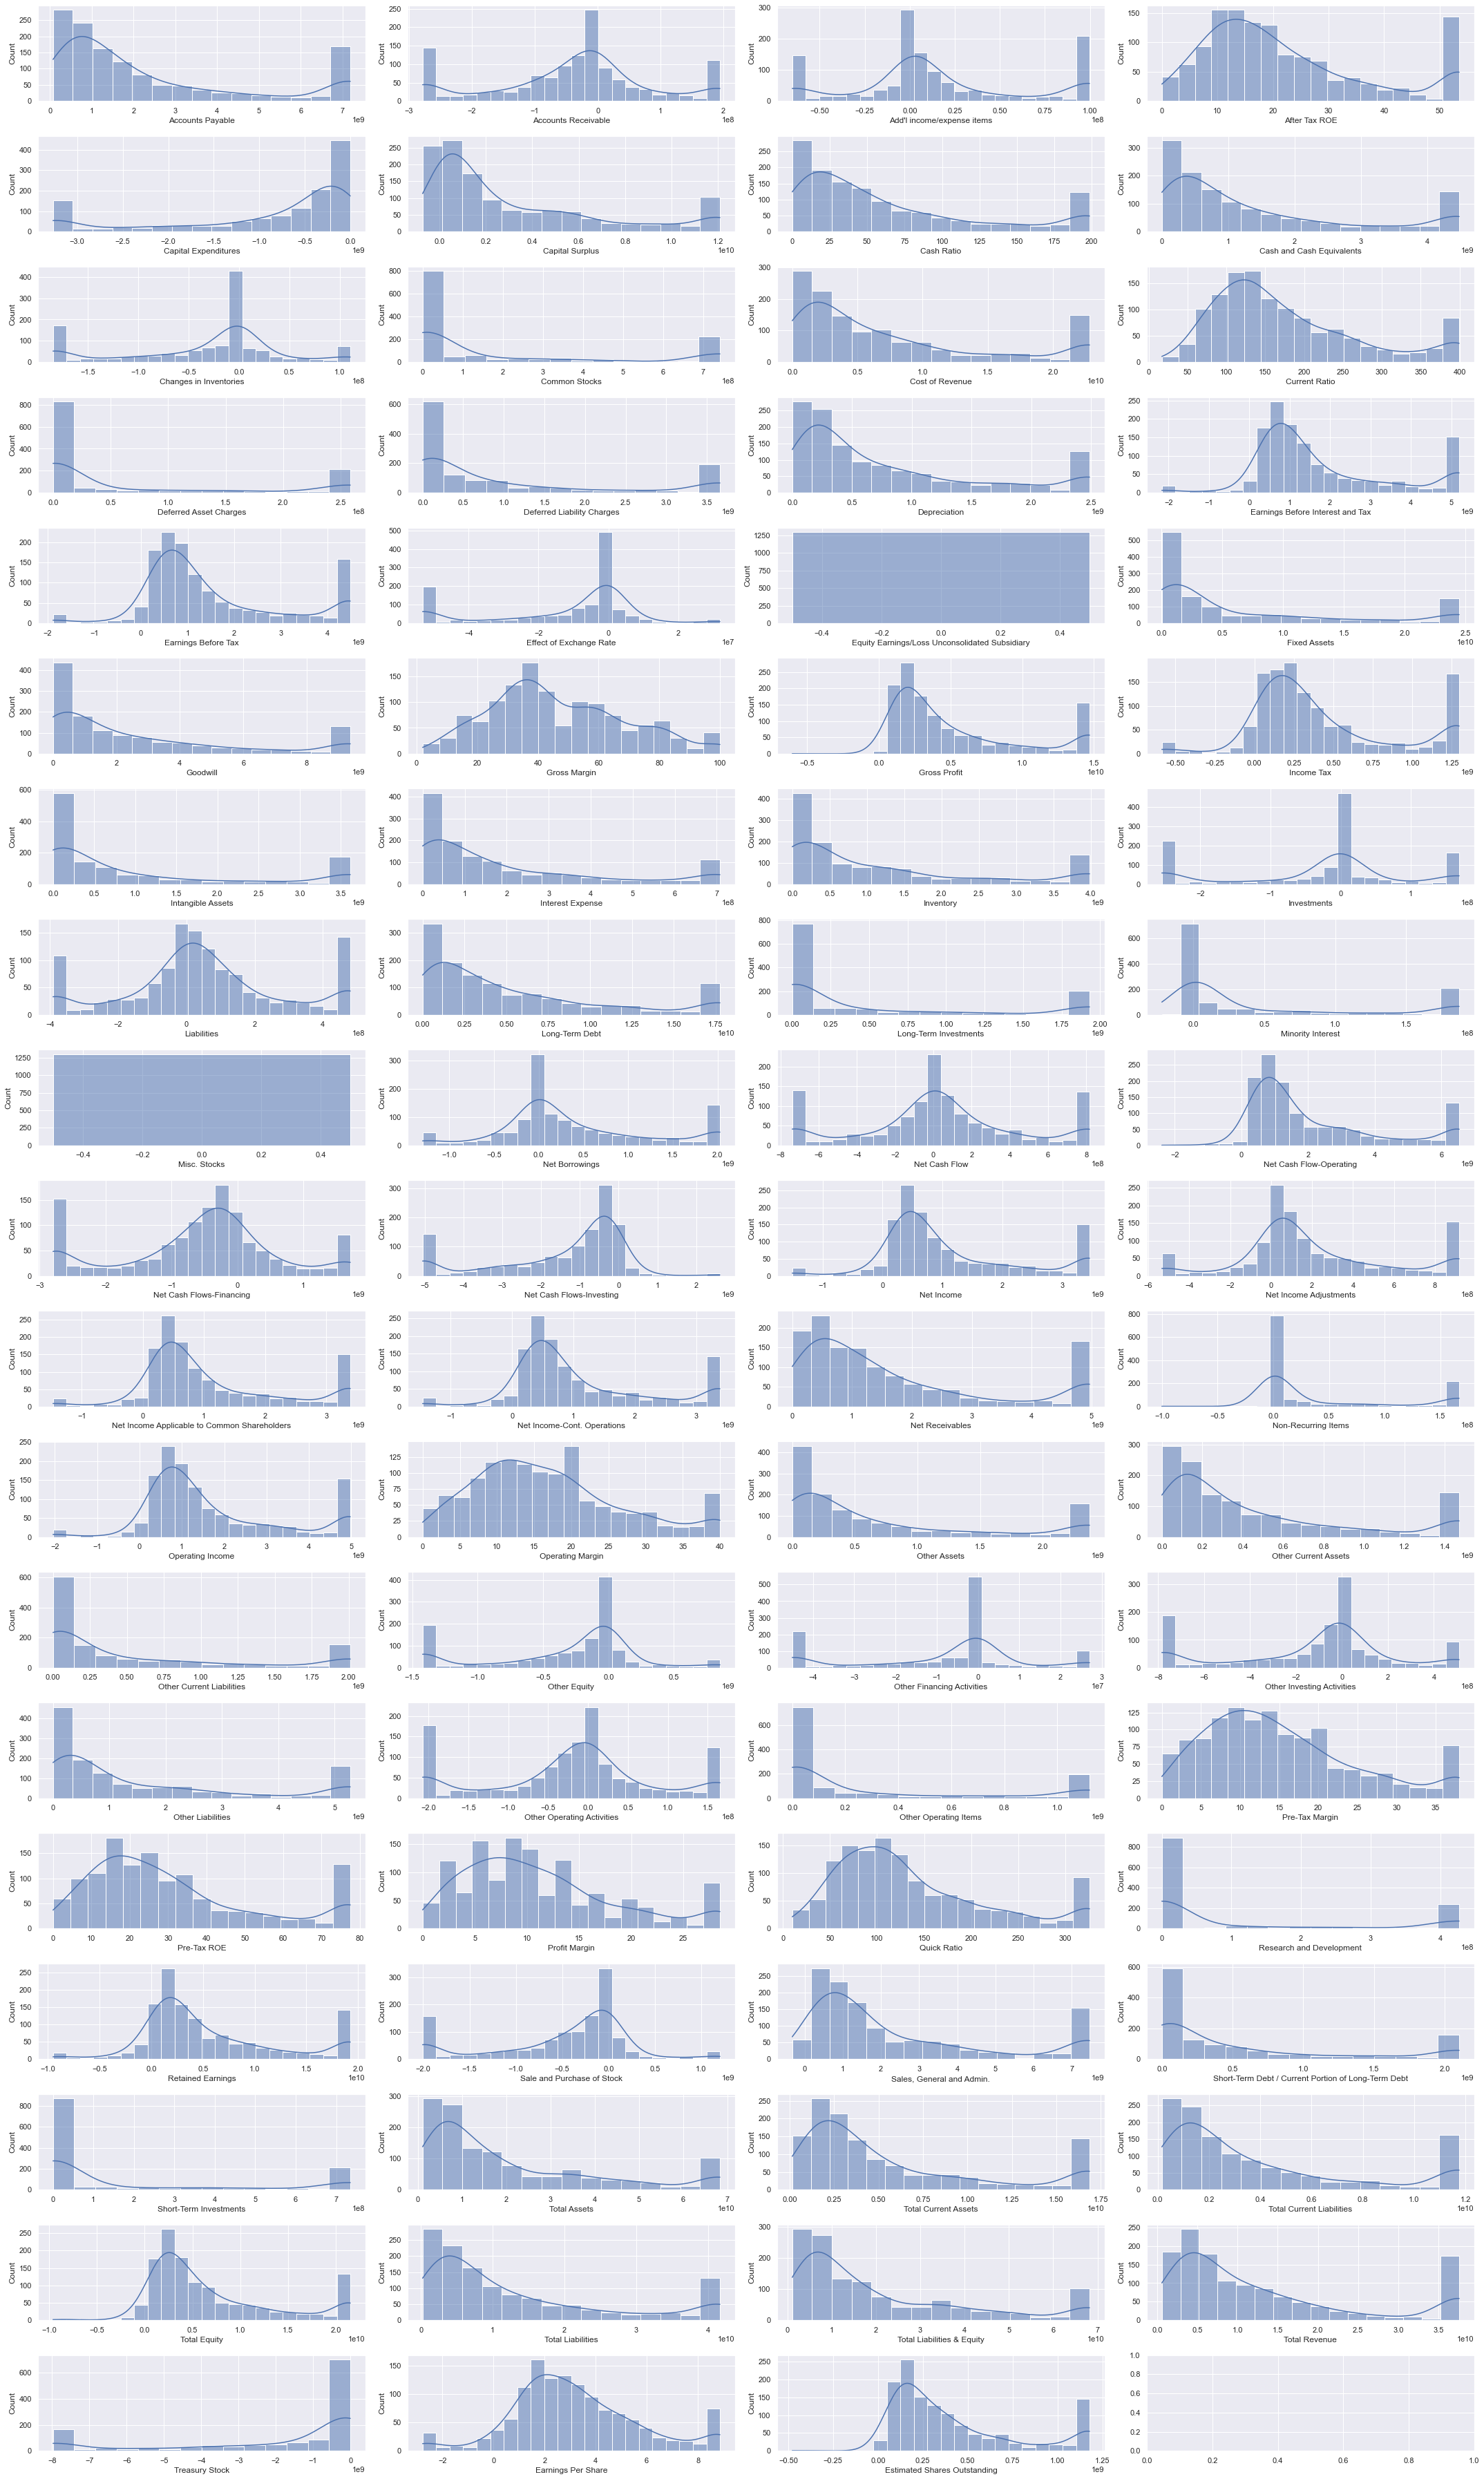

In [33]:
f, axes = plt.subplots(nrows=19, ncols=4, figsize=dims)  
y = 0;
for name in col_names:
    i, j = divmod(y, 4)
    sns.histplot(x=df_copy_2[name], ax=axes[i, j], kde=True)
    y = y + 1

plt.tight_layout()
plt.show()

#### After transformation 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


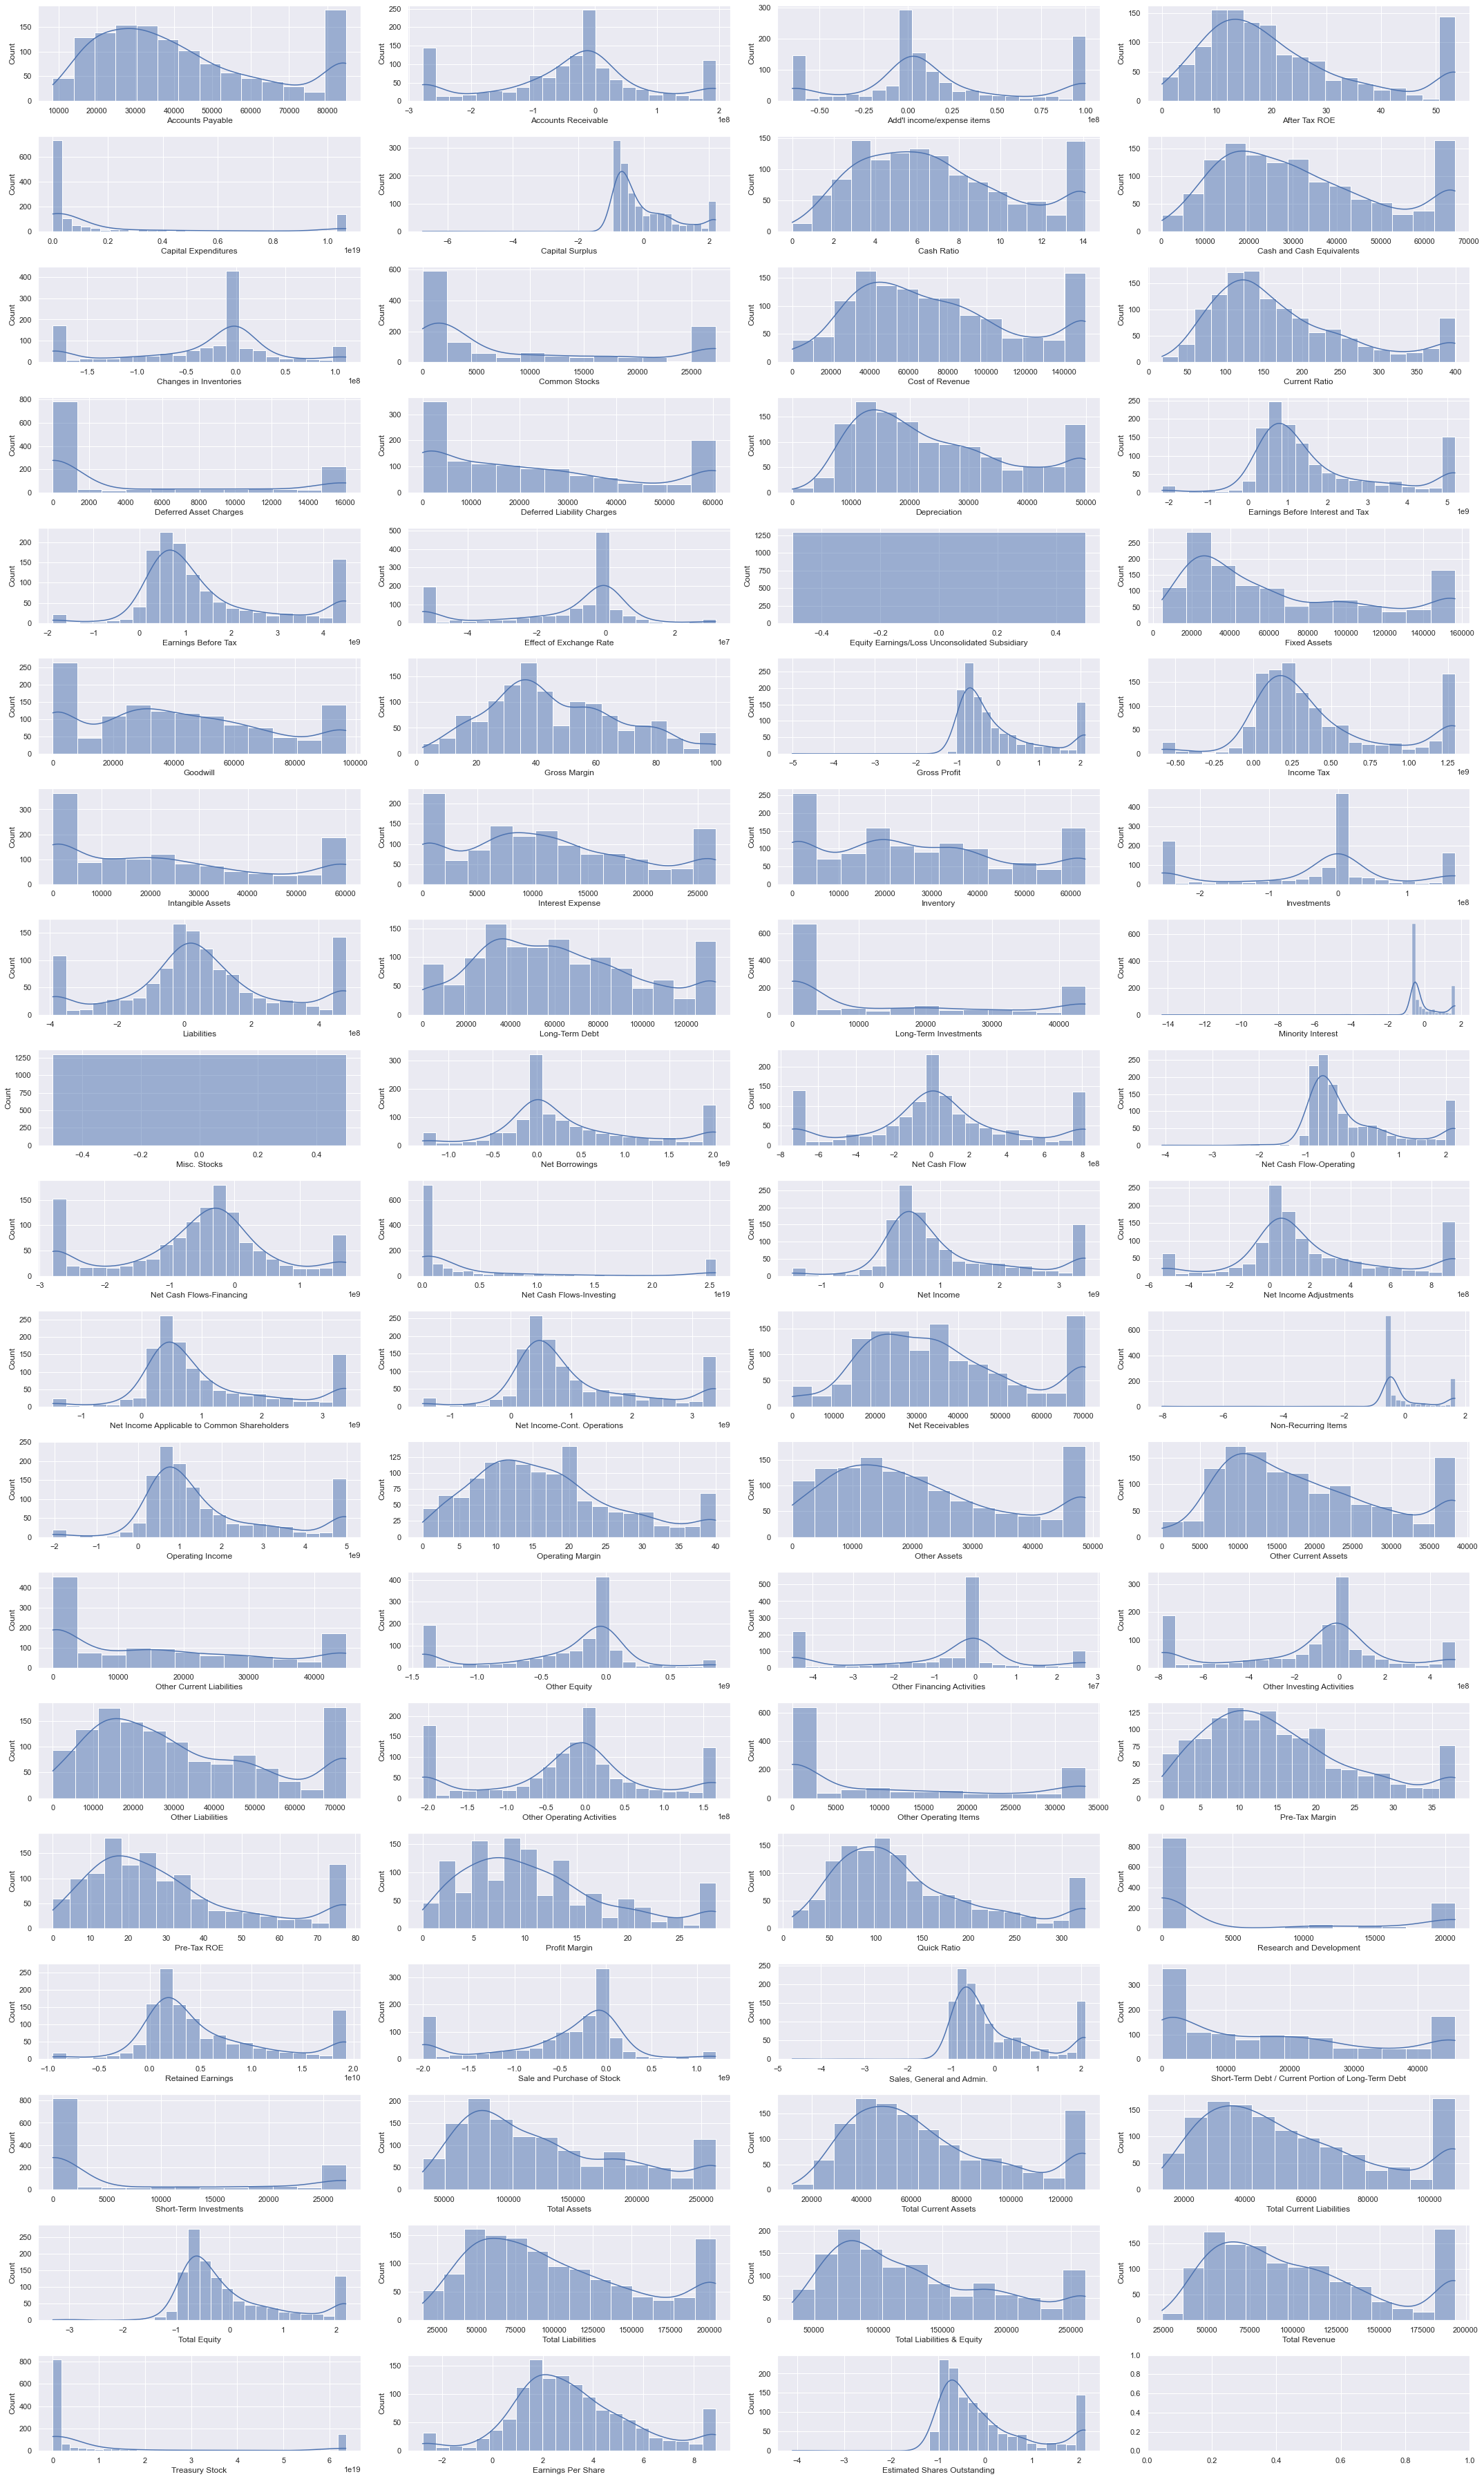

In [34]:
f, axes = plt.subplots(nrows=19, ncols=4, figsize=dims)  
y = 0;
for name in col_names:
    i, j = divmod(y, 4)
    sns.histplot(x=df_copy_3[name], ax=axes[i, j], kde=True)
    y = y + 1

plt.tight_layout()
plt.show()

In [35]:
# new skewed values
skew_values_new=pd.DataFrame(df_copy_3.skew(axis=0,skipna=True))
skew_values_new=skew_values_new.reset_index()
skew_values_new.rename(columns = {'index':'Column_name',0:'Skew_values'}, inplace = True)
skew_values_new.head(4)

Column_name  Skew_values
0            Accounts Payable     0.665903
1         Accounts Receivable    -0.215887
2  Add'l income/expense items     0.349647
3               After Tax ROE     0.928832

### Feature encoding

* For Year variable is encoded into categories. One hot encorder is used to create the coded values.

In [37]:
df_copy_3['For Year']=df['For Year'].values
df_copy_3.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0      55389.529697         -222000000.0                 -65246875.0   
1      70533.679898          -93000000.0                 -65246875.0   
2      68322.763410         -160000000.0                 -65246875.0   
3      71428.285714          194375000.0                 -65246875.0   
4      49086.179318          -89482000.0                    600000.0   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0           23.0          3.564544e+18         0.436037    7.280110   
1           53.5          9.696996e+18         1.850671    8.660254   
2           53.5          1.066337e+19         2.197023    7.745967   
3           53.5          1.066337e+19         2.082420    7.141428   
4           32.0          7.353968e+16        -0.671248    4.795832   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               36469.165058                     0.0   11269.427670   
1               46636.895265                     0.0    2236.067977   
2               42047.592083                     0.0    2645.751311   
3               32939.338184                     0.0    2449.489743   
4               24456.307980            -184366250.0      83.666003   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0    102464.628043           78.0                 0.00000   
1    104971.424683          104.0                 0.00000   
2    124979.998400           88.0                 0.00000   
3    105337.552658           73.0             16075.68039   
4     55740.174022          124.0                 0.00000   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                14933.184523  31638.584039                     -1.813000e+09   
1                30577.769703  31937.438845                     -1.324000e+09   
2                28792.360098  36633.318168                      4.099000e+09   
3                25826.343140  38561.638969                      5.197209e+09   
4                    0.000000  13767.497957                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -1.887286e+09                      0.0   
1        -1.887286e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.492091e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary   Fixed Assets  \
0                                             0.0  115767.007390   
1                                             0.0  138776.799214   
2                                             0.0  151934.196282   
3                                             0.0  156441.718381   
4                                             0.0   35952.009680   

       Goodwill  Gross Margin  Gross Profit   Income Tax  Intangible Assets  \
0      0.000000          58.0      2.047912 -569000000.0       29478.805946   
1  63921.827258          59.0      2.122361 -346000000.0       48072.861367   
2  63960.925572          63.0      2.122361  330000000.0       47328.638265   
3  63960.925572          73.0      2.122361 -586084125.0       47423.622806   
4   8740.080091          50.0     -0.438893  236404000.0        5370.754137   

   Interest Expense     Inventory  Investments  Liabilities  Long-Term Debt  \
0      25139.610180  24083.189158  168729250.0  473000000.0    84356.386836   
1      26603.512456  31811.947441 -254748750.0 -235000000.0   123907.223357   
2      26603.512456  31685.959036  168729250.0 -391213750.0   126660.964784   
3      26603.512456  29376.861643  168729250.0 -391213750.0   133254.174419   
4       5817.301780  48047.986430          0.0  426323000.0    24585.788578   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0                    0.0          -0.532176           0.0   -1.020000e+09   
1                    0.0          -0.53217

In [38]:
# converting to a category
df_copy_3['For Year']=df_copy_3['For Year'].astype('int')
df_copy_3['For Year']=df_copy_3['For Year'].astype('category')

In [39]:
df_encoded = pd.get_dummies(df_copy_3, columns = ['For Year'],drop_first = True)
df_encoded.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0      55389.529697         -222000000.0                 -65246875.0   
1      70533.679898          -93000000.0                 -65246875.0   
2      68322.763410         -160000000.0                 -65246875.0   
3      71428.285714          194375000.0                 -65246875.0   
4      49086.179318          -89482000.0                    600000.0   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0           23.0          3.564544e+18         0.436037    7.280110   
1           53.5          9.696996e+18         1.850671    8.660254   
2           53.5          1.066337e+19         2.197023    7.745967   
3           53.5          1.066337e+19         2.082420    7.141428   
4           32.0          7.353968e+16        -0.671248    4.795832   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               36469.165058                     0.0   11269.427670   
1               46636.895265                     0.0    2236.067977   
2               42047.592083                     0.0    2645.751311   
3               32939.338184                     0.0    2449.489743   
4               24456.307980            -184366250.0      83.666003   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0    102464.628043           78.0                 0.00000   
1    104971.424683          104.0                 0.00000   
2    124979.998400           88.0                 0.00000   
3    105337.552658           73.0             16075.68039   
4     55740.174022          124.0                 0.00000   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                14933.184523  31638.584039                     -1.813000e+09   
1                30577.769703  31937.438845                     -1.324000e+09   
2                28792.360098  36633.318168                      4.099000e+09   
3                25826.343140  38561.638969                      5.197209e+09   
4                    0.000000  13767.497957                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -1.887286e+09                      0.0   
1        -1.887286e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.492091e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary   Fixed Assets  \
0                                             0.0  115767.007390   
1                                             0.0  138776.799214   
2                                             0.0  151934.196282   
3                                             0.0  156441.718381   
4                                             0.0   35952.009680   

       Goodwill  Gross Margin  Gross Profit   Income Tax  Intangible Assets  \
0      0.000000          58.0      2.047912 -569000000.0       29478.805946   
1  63921.827258          59.0      2.122361 -346000000.0       48072.861367   
2  63960.925572          63.0      2.122361  330000000.0       47328.638265   
3  63960.925572          73.0      2.122361 -586084125.0       47423.622806   
4   8740.080091          50.0     -0.438893  236404000.0        5370.754137   

   Interest Expense     Inventory  Investments  Liabilities  Long-Term Debt  \
0      25139.610180  24083.189158  168729250.0  473000000.0    84356.386836   
1      26603.512456  31811.947441 -254748750.0 -235000000.0   123907.223357   
2      26603.512456  31685.959036  168729250.0 -391213750.0   126660.964784   
3      26603.512456  29376.861643  168729250.0 -391213750.0   133254.174419   
4       5817.301780  48047.986430          0.0  426323000.0    24585.788578   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0                    0.0          -0.532176           0.0   -1.020000e+09   
1                    0.0          -0.53217

* Four columns will be created as For Year_2013,For Year_2014, 	For Year_2015, For Year_2016 with encoded values.

### standerdizing

In [41]:
# selecting only the quantitative varibles.
df_numeric=df_encoded.iloc[:,:-4]
df_numeric.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0      55389.529697         -222000000.0                 -65246875.0   
1      70533.679898          -93000000.0                 -65246875.0   
2      68322.763410         -160000000.0                 -65246875.0   
3      71428.285714          194375000.0                 -65246875.0   
4      49086.179318          -89482000.0                    600000.0   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0           23.0          3.564544e+18         0.436037    7.280110   
1           53.5          9.696996e+18         1.850671    8.660254   
2           53.5          1.066337e+19         2.197023    7.745967   
3           53.5          1.066337e+19         2.082420    7.141428   
4           32.0          7.353968e+16        -0.671248    4.795832   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               36469.165058                     0.0   11269.427670   
1               46636.895265                     0.0    2236.067977   
2               42047.592083                     0.0    2645.751311   
3               32939.338184                     0.0    2449.489743   
4               24456.307980            -184366250.0      83.666003   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0    102464.628043           78.0                 0.00000   
1    104971.424683          104.0                 0.00000   
2    124979.998400           88.0                 0.00000   
3    105337.552658           73.0             16075.68039   
4     55740.174022          124.0                 0.00000   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                14933.184523  31638.584039                     -1.813000e+09   
1                30577.769703  31937.438845                     -1.324000e+09   
2                28792.360098  36633.318168                      4.099000e+09   
3                25826.343140  38561.638969                      5.197209e+09   
4                    0.000000  13767.497957                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -1.887286e+09                      0.0   
1        -1.887286e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.492091e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary   Fixed Assets  \
0                                             0.0  115767.007390   
1                                             0.0  138776.799214   
2                                             0.0  151934.196282   
3                                             0.0  156441.718381   
4                                             0.0   35952.009680   

       Goodwill  Gross Margin  Gross Profit   Income Tax  Intangible Assets  \
0      0.000000          58.0      2.047912 -569000000.0       29478.805946   
1  63921.827258          59.0      2.122361 -346000000.0       48072.861367   
2  63960.925572          63.0      2.122361  330000000.0       47328.638265   
3  63960.925572          73.0      2.122361 -586084125.0       47423.622806   
4   8740.080091          50.0     -0.438893  236404000.0        5370.754137   

   Interest Expense     Inventory  Investments  Liabilities  Long-Term Debt  \
0      25139.610180  24083.189158  168729250.0  473000000.0    84356.386836   
1      26603.512456  31811.947441 -254748750.0 -235000000.0   123907.223357   
2      26603.512456  31685.959036  168729250.0 -391213750.0   126660.964784   
3      26603.512456  29376.861643  168729250.0 -391213750.0   133254.174419   
4       5817.301780  48047.986430          0.0  426323000.0    24585.788578   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0                    0.0          -0.532176           0.0   -1.020000e+09   
1                    0.0          -0.53217

* We can examine that the variables have values in different ranges. Some variables have very high values while some other variables have very less values. Hence the Standard Scalar is used to scale the varaibles. Hence all the variables will have same range.

In [42]:
col_names = list(df_numeric.columns)

# create the scaler object
scaler = StandardScaler()

# fit the scaler to the  data
scaler.fit(df_numeric)

scaled = scaler.transform(df_numeric)
df_numeric_scaled = pd.DataFrame(scaled)
df_numeric_scaled.columns = col_names
df_numeric_scaled.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0          0.556601            -1.442299                   -1.641485   
1          1.230871            -0.421428                   -1.641485   
2          1.132434            -0.951648                   -1.641485   
3          1.270702             1.852780                   -1.641485   
4          0.275955            -0.393588                   -0.293316   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0       0.078353              0.424888         0.436037    0.079335   
1       2.141486              2.159509         1.850671    0.447053   
2       2.141486              2.432857         2.197023    0.203456   
3       2.141486              2.432857         2.082420    0.042386   
4       0.687146             -0.562575        -0.671248   -0.582562   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0                   0.223092                0.431368       0.213155   
1                   0.768740                0.431368      -0.677206   
2                   0.522457                0.431368      -0.636826   
3                   0.033665                0.431368      -0.656171   
4                  -0.421573               -1.906276      -0.889355   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0         0.670332      -1.036965               -0.719888   
1         0.730088      -0.760241               -0.719888   
2         1.207047      -0.930533               -0.719888   
3         0.738816      -1.090182                1.777567   
4        -0.443473      -0.547376               -0.719888   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                   -0.394277      0.536516                         -2.112614   
1                    0.341154      0.559129                         -1.819602   
2                    0.257224      0.914448                          1.429888   
3                    0.117795      1.060357                          2.087941   
4                   -1.096266     -0.815719                         -0.632028   

   Earnings Before Tax  Effect of Exchange Rate  \
0            -2.262898                 0.580303   
1            -2.262898                 0.580303   
2             1.173429                 0.580303   
3             2.036063                 0.580303   
4            -0.570533                 0.580303   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets  Goodwill  \
0                                             0.0      1.034648 -1.344045   
1                                             0.0      1.519320  0.743081   
2                                             0.0      1.796464  0.744358   
3                                             0.0      1.891409  0.744358   
4                                             0.0     -0.646552 -1.058670   

   Gross Margin  Gross Profit  Income Tax  Intangible Assets  \
0      0.506785      2.047912   -2.189259           0.300178   
1      0.551622      2.122361   -1.692702           1.184477   
2      0.730971      2.122361   -0.187445           1.149083   
3      1.179343      2.122361   -2.227300           1.153601   
4      0.148087     -0.438893   -0.395856          -0.846357   

   Interest Expense  Inventory  Investments  Liabilities  Long-Term Debt  \
0          1.679421  -0.148182     1.566347     1.824502        0.581345   
1          1.857711   0.231108    -1.724285    -1.233175        1.639067   
2          1.857711   0.224925     1.566347    -1.907824        1.712711   
3          1.857711   0.111605     1.566347    -1.907824        1.889036   
4         -0.673861   1.027893     0.255238     1.622915       -1.017122   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0              -0.811144          -0.532176           0.0       -1.688189   
1              -0.811144          -0.532176           0.0        1.990888   
2              -0.8

#### Before appliying scaling

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


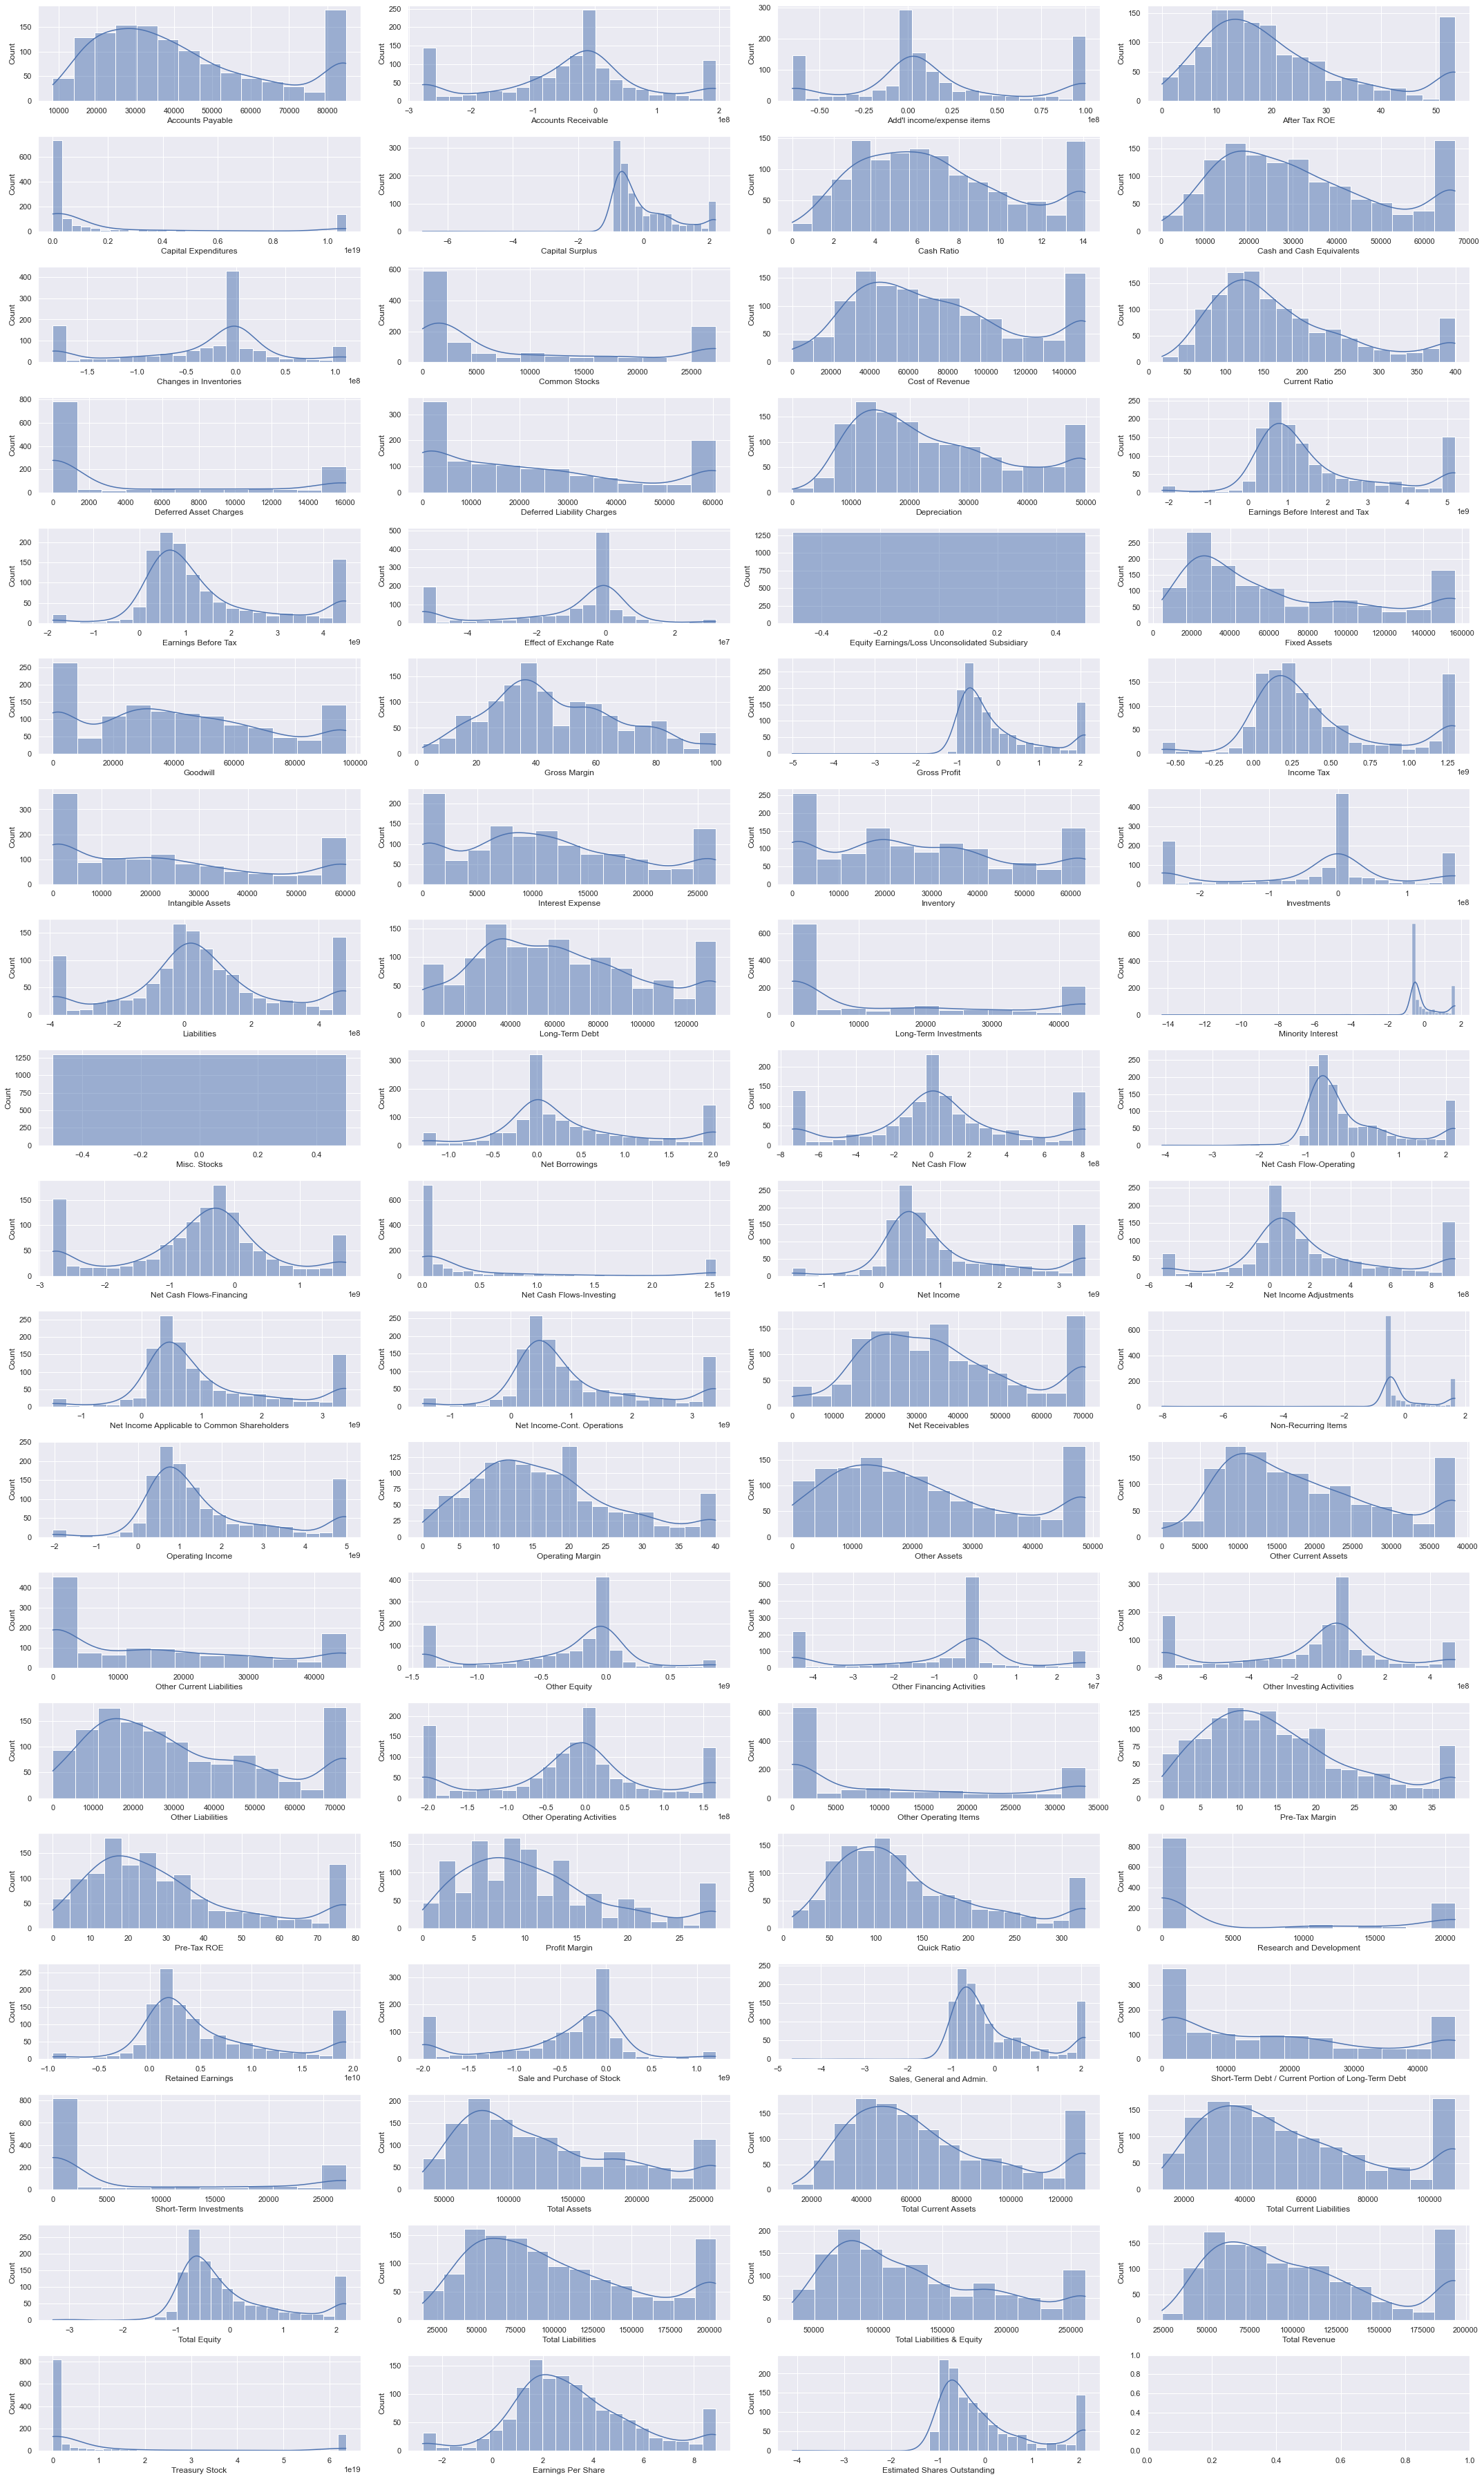

In [43]:
names = list(df_numeric.columns)
dims = (30, 50)
f, axes = plt.subplots(nrows=19, ncols=4, figsize=dims)  
y = 0;
for name in names:
    i, j = divmod(y, 4)
    sns.histplot(x=df_numeric[name], ax=axes[i, j], kde=True)
    y = y + 1

plt.tight_layout()
plt.show()

#### After applying scaling

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


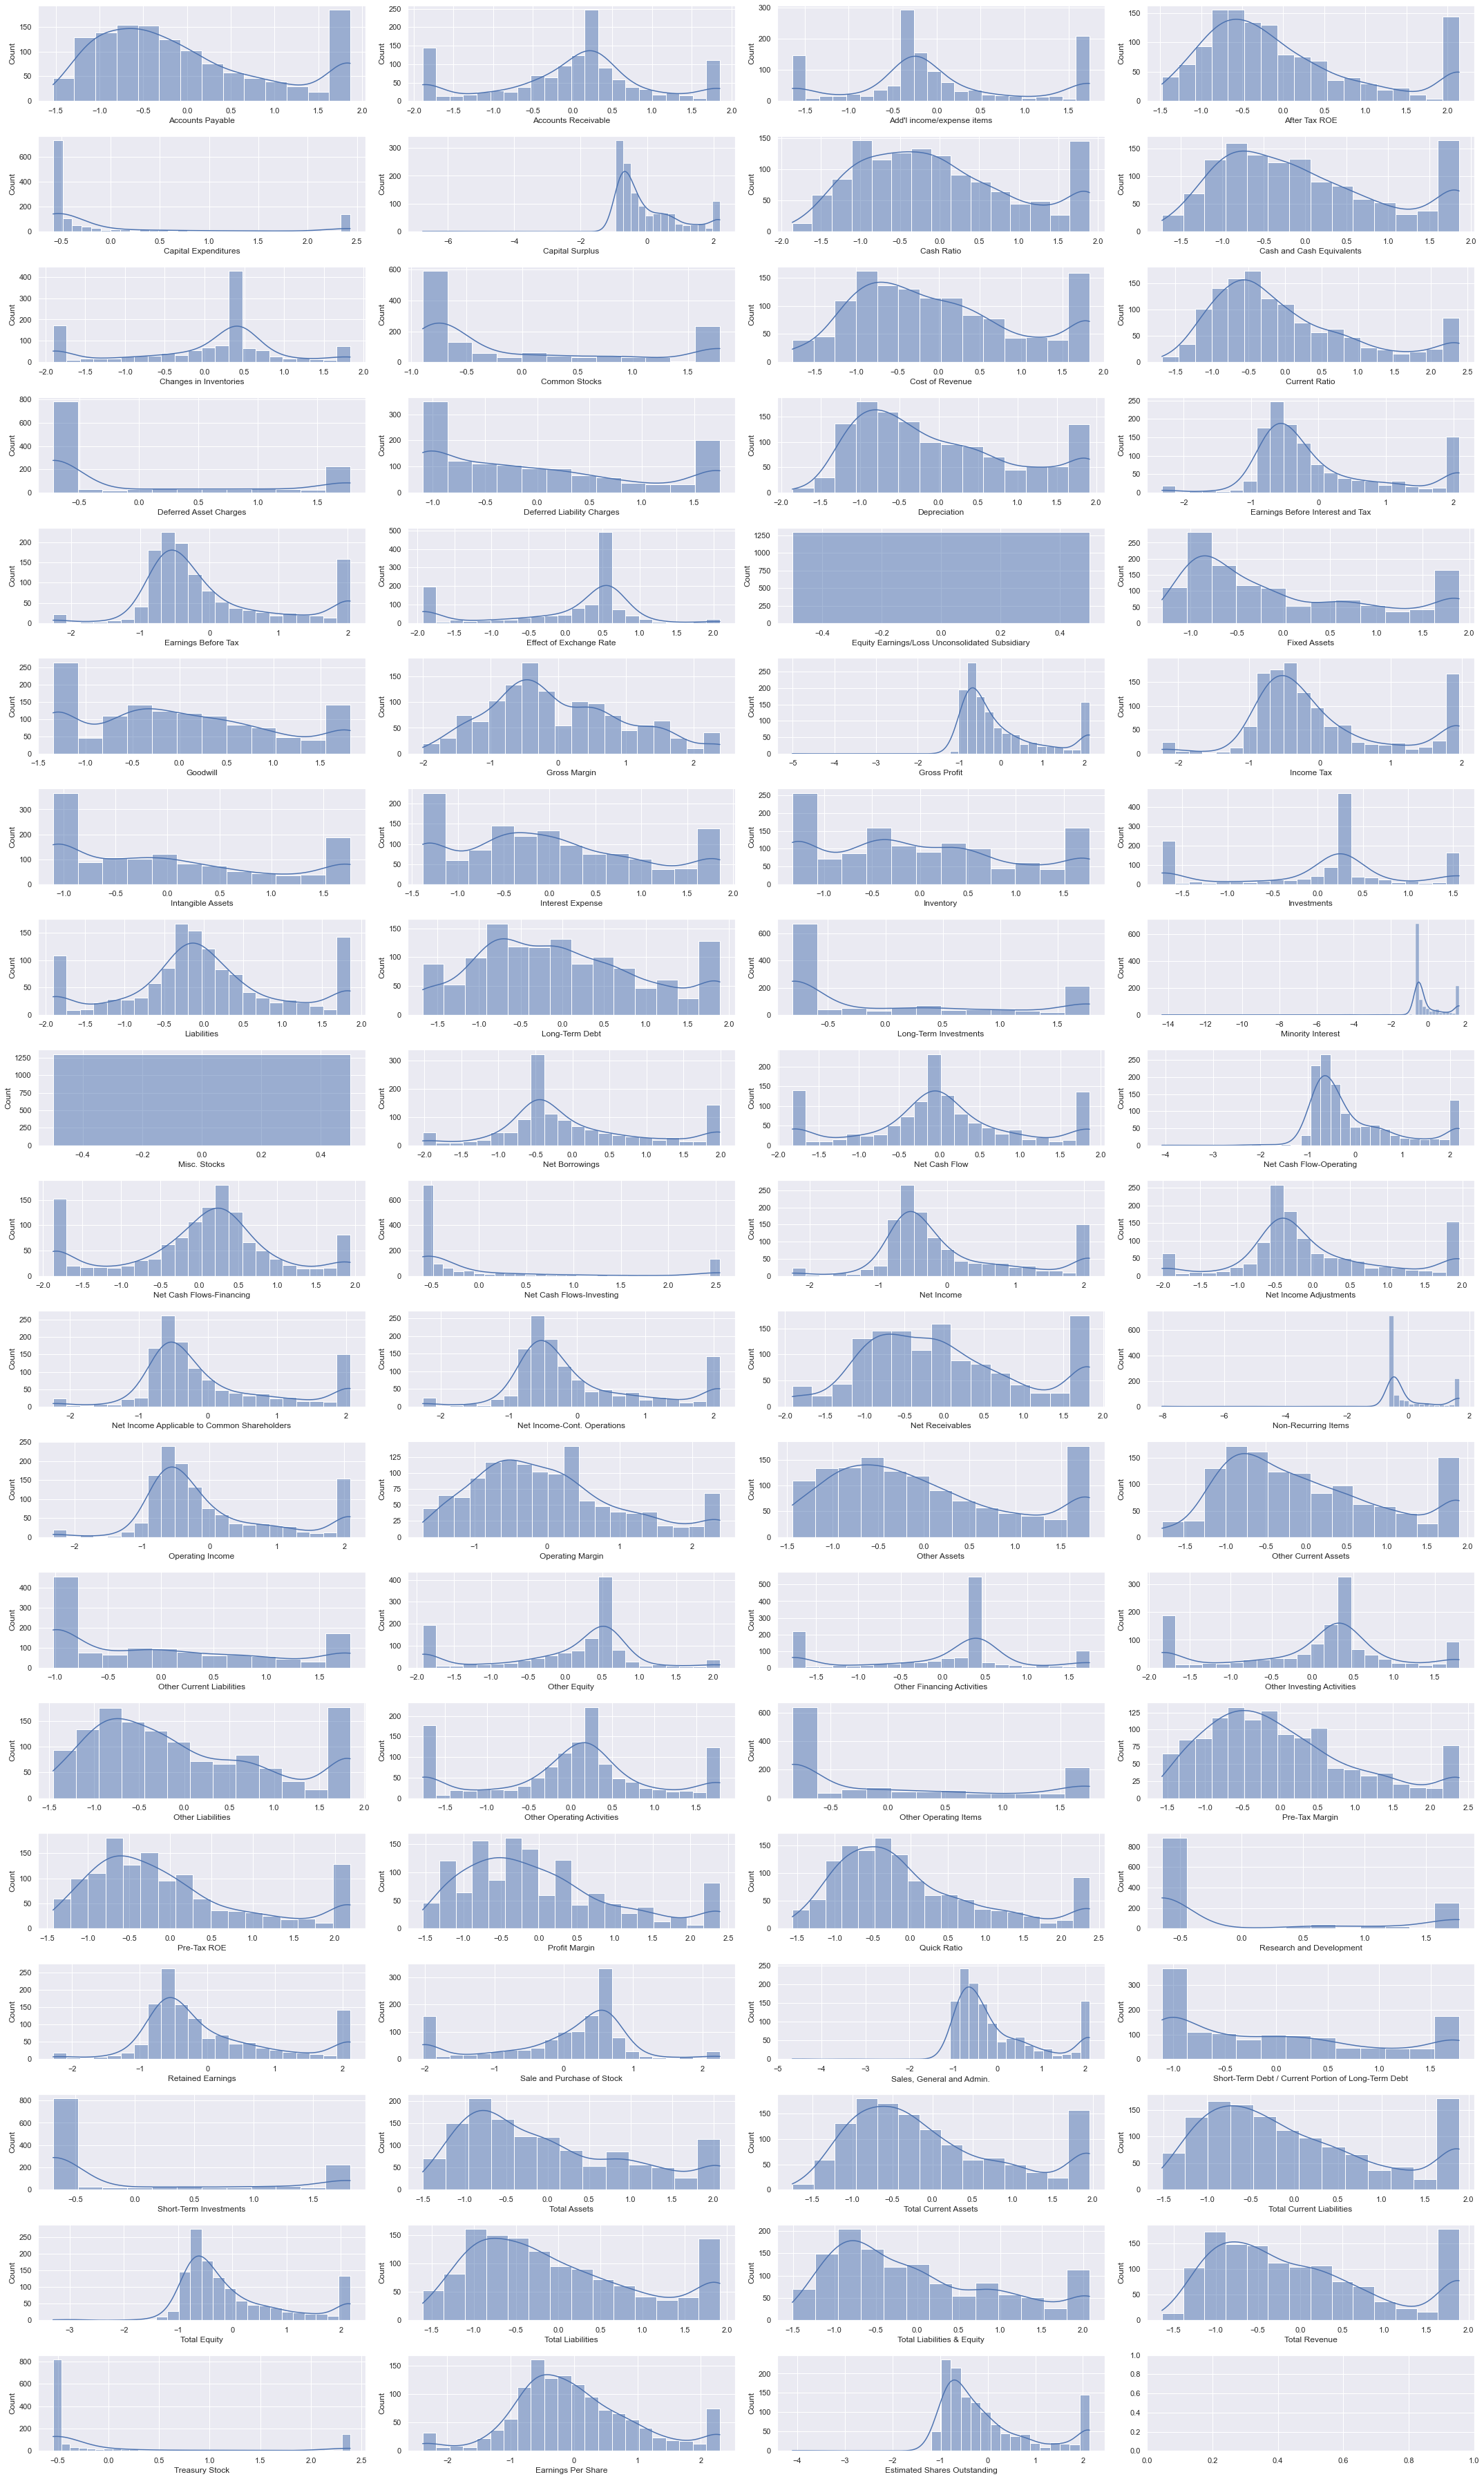

In [44]:
names = list(df_numeric_scaled.columns)
dims = (30, 50)
f, axes = plt.subplots(nrows=19, ncols=4, figsize=dims)  
y = 0;
for name in names:
    i, j = divmod(y, 4)
    sns.histplot(x=df_numeric_scaled[name], ax=axes[i, j], kde=True)
    y = y + 1

plt.tight_layout()
plt.show()

* Feature discretization is not applied here because feature discretization would cause to loss of information. since it is required to apply a PCA in the next question,feature discretization is not applied to ensure the information in the dataset are not lost 

### PCA

In [46]:
# Removing the response varible
df_pca_applied = df_numeric_scaled.drop(columns=['Estimated Shares Outstanding'])
correlation_matrix = df_pca_applied.corr()
correlation_matrix

Accounts Payable  Accounts Receivable  \
Accounts Payable                    1.000000            -0.116637   
Accounts Receivable                -0.116637             1.000000   
Add'l income/expense items          0.164427             0.025209   
After Tax ROE                       0.111332            -0.021249   
Capital Expenditures                0.454834            -0.030396   
...                                      ...                  ...   
Total Liabilities                   0.778633            -0.070317   
Total Liabilities & Equity          0.779498            -0.082506   
Total Revenue                       0.904514            -0.125202   
Treasury Stock                      0.459360            -0.054394   
Earnings Per Share                  0.207369            -0.105716   

                            Add'l income/expense items  After Tax ROE  \
Accounts Payable                              0.164427       0.111332   
Accounts Receivable                           0.025209      -0.021249   
Add'l income/expense items                    1.000000      -0.075665   
After Tax ROE                                -0.075665       1.000000   
Capital Expenditures                          0.305010      -0.105877   
...                                                ...            ...   
Total Liabilities                             0.245630      -0.019137   
Total Liabilities & Equity                    0.293656      -0.135514   
Total Revenue                                 0.163734       0.094054   
Treasury Stock                                0.091524       0.180565   
Earnings Per Share                            0.103967       0.266150   

                            Capital Expenditures  Capital Surplus  Cash Ratio  \
Accounts Payable                        0.454834         0.301467   -0.205139   
Accounts Receivable                    -0.030396        -0.016396   -0.010810   
Add'l income/expense items              0.305010         0.071756   -0.024997   
After Tax ROE                          -0.105877        -0.201378    0.030983   
Capital Expenditures                    1.000000         0.309525   -0.207648   
...                                          ...              ...         ...   
Total Liabilities                       0.684834         0.421477   -0.301502   
Total Liabilities & Equity              0.714441         0.478779   -0.199072   
Total Revenue                           0.475032         0.288061   -0.206503   
Treasury Stock                          0.137624         0.232754   -0.035721   
Earnings Per Share                      0.021675        -0.141903   -0.052200   

                            Cash and Cash Equivalents  Changes in Inventories  \
Accounts Payable                             0.674999               -0.251823   
Accounts Receivable                         -0.124006                0.155915   
Add'l income/expense items                   0.158304                0.003155   
After Tax ROE                                0.097509               -0.088504   
Capital Expenditures                         0.293652               -0.017964   
...                                               ...                     ...   
Total Liabilities                            0.523302               -0.115135   
Total Liabilities & Equity                   0.592813               -0.121877   
Total Revenue                                0.624853               -0.259881   
Treasury Stock                               0.411569               -0.154773   
Earnings Per Share                           0.118623               -0.160133   

                            Common Stocks  Cost of Revenue  Current Ratio  \
Accounts Payable                 0.369235         0.797773      -0.295604   
Accounts Receivable              0.006142        -0.077528      -0.042379   
Add'l income/expense items       0.204849         0.151643      -0.065314   
After Tax ROE                   -0.065557         0.071165      -0.0

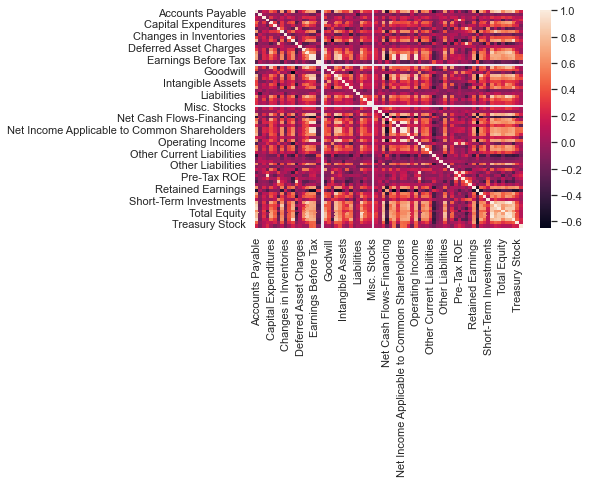

In [47]:
# visualizing the coorelation
sns.heatmap(correlation_matrix, annot = False)
plt.show()

* It is visible by the white lines,  that the highly correlate variables are available here. Those variables are identified first.

In [48]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any((upper_tri[column] >0.99)) ]
to_drop

<ipython-input-48-0b577c0de48b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


['Net Income Applicable to Common Shareholders', 'Total Liabilities & Equity']

* Above two varibles are highly correlated ( r is very close to 1). Hence those two vatbles are dropped.

In [49]:
df_pca_applied = df_pca_applied.drop(columns=['Net Income Applicable to Common Shareholders', 'Total Liabilities & Equity'])
df_pca_applied.head()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0          0.556601            -1.442299                   -1.641485   
1          1.230871            -0.421428                   -1.641485   
2          1.132434            -0.951648                   -1.641485   
3          1.270702             1.852780                   -1.641485   
4          0.275955            -0.393588                   -0.293316   

   After Tax ROE  Capital Expenditures  Capital Surplus  Cash Ratio  \
0       0.078353              0.424888         0.436037    0.079335   
1       2.141486              2.159509         1.850671    0.447053   
2       2.141486              2.432857         2.197023    0.203456   
3       2.141486              2.432857         2.082420    0.042386   
4       0.687146             -0.562575        -0.671248   -0.582562   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0                   0.223092                0.431368       0.213155   
1                   0.768740                0.431368      -0.677206   
2                   0.522457                0.431368      -0.636826   
3                   0.033665                0.431368      -0.656171   
4                  -0.421573               -1.906276      -0.889355   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0         0.670332      -1.036965               -0.719888   
1         0.730088      -0.760241               -0.719888   
2         1.207047      -0.930533               -0.719888   
3         0.738816      -1.090182                1.777567   
4        -0.443473      -0.547376               -0.719888   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                   -0.394277      0.536516                         -2.112614   
1                    0.341154      0.559129                         -1.819602   
2                    0.257224      0.914448                          1.429888   
3                    0.117795      1.060357                          2.087941   
4                   -1.096266     -0.815719                         -0.632028   

   Earnings Before Tax  Effect of Exchange Rate  \
0            -2.262898                 0.580303   
1            -2.262898                 0.580303   
2             1.173429                 0.580303   
3             2.036063                 0.580303   
4            -0.570533                 0.580303   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets  Goodwill  \
0                                             0.0      1.034648 -1.344045   
1                                             0.0      1.519320  0.743081   
2                                             0.0      1.796464  0.744358   
3                                             0.0      1.891409  0.744358   
4                                             0.0     -0.646552 -1.058670   

   Gross Margin  Gross Profit  Income Tax  Intangible Assets  \
0      0.506785      2.047912   -2.189259           0.300178   
1      0.551622      2.122361   -1.692702           1.184477   
2      0.730971      2.122361   -0.187445           1.149083   
3      1.179343      2.122361   -2.227300           1.153601   
4      0.148087     -0.438893   -0.395856          -0.846357   

   Interest Expense  Inventory  Investments  Liabilities  Long-Term Debt  \
0          1.679421  -0.148182     1.566347     1.824502        0.581345   
1          1.857711   0.231108    -1.724285    -1.233175        1.639067   
2          1.857711   0.224925     1.566347    -1.907824        1.712711   
3          1.857711   0.111605     1.566347    -1.907824        1.889036   
4         -0.673861   1.027893     0.255238     1.622915       -1.017122   

   Long-Term Investments  Minority Interest  Misc. Stocks  Net Borrowings  \
0              -0.811144          -0.532176           0.0       -1.688189   
1              -0.811144          -0.532176           0.0        1.990888   
2              -0.8

#### Applying PCA

In [50]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_pca=pca.fit_transform(df_pca_applied) 
pca.fit(df_pca_applied)

PCA()

In [51]:
# pca df
principalDf = pd.DataFrame(data = X_pca)
principalDf.head()

0         1         2         3         4         5         6   \
0  0.076099  4.862397 -0.427807  2.358962  2.874996  0.150231  6.219774   
1  2.826455  4.776148  1.185615  1.962743  4.007202  0.091676  5.015821   
2  6.666168  1.668533  0.030663 -1.381300  2.347863  0.487384  3.865689   
3  7.742572  0.310809  0.846627 -2.774182  2.644935  1.641672  1.033155   
4 -3.621918 -0.074548 -2.723278 -1.580042 -0.385967 -2.120501  1.717183   

         7         8         9         10        11        12        13  \
0  2.401283 -0.705293  0.090666 -0.701925 -1.443180  0.675062  0.303935   
1  5.485854  0.552084  0.498110  1.382317  0.792052 -0.495664 -0.469416   
2  1.512165  1.247350 -0.680847  1.075582  1.760048  1.835682  0.552462   
3  1.373491  1.654876  0.264531  1.887343  4.238842  2.291564  4.058604   
4  0.400073 -0.258108 -0.706039 -0.562417 -0.787464 -0.042356  0.794295   

         14        15        16        17        18        19        20  \
0  0.658808  1.130914  1.278678  0.093228  3.065994 -0.689260 -0.839583   
1  2.872669  2.516385  1.175845  1.637957  0.977675  0.625322 -0.186455   
2  1.087596  0.472921  2.418541  1.391368  1.653183 -0.796898 -1.156525   
3  1.533428  1.173357  1.120319  1.614853  1.586293 -0.927115 -2.446911   
4  0.636611  0.339007 -1.242252 -0.074202 -1.805071 -0.108251 -0.386852   

         21        22        23        24        25        26        27  \
0 -0.823393 -0.142141 -0.176737  1.327376  0.008094  1.873729  0.901571   
1 -1.480779  1.423962  0.523147  1.436489 -1.473488  0.083353  0.358131   
2 -2.440221  1.192477 -0.469841  3.541758 -1.424908  0.885000  0.293810   
3 -2.200214  0.858806  0.839395  2.052411 -0.498487  0.308185  0.425279   
4  0.503248 -0.142919  0.266874 -0.029195  0.354041  0.192063 -0.311209   

         28        29        30        31        32        33        34  \
0  0.305423 -1.262207 -1.201726  0.650142  0.740032  0.440033 -0.076122   
1 -0.354755  0.086011 -1.429748  0.551917  0.473086  0.596865 -0.605159   
2 -0.676895  0.834128 -0.896127  0.463671 -0.592714 -1.052036  0.015193   
3 -0.885393 -0.223475  1.142698  0.611944  0.024227  0.543463  0.087280   
4  0.318241  0.036590  0.012927 -0.248510  0.105256  0.478577  0.328889   

         35        36        37        38        39        40        41  \
0 -1.326999 -0.385758 -0.611870 -0.424790  0.277102  0.434029  0.146552   
1 -0.494580 -0.556940 -0.542389  0.722036  0.853503 -0.307163 -0.119881   
2 -1.171938 -0.180907 -0.238653 -0.210891  0.317753  0.121853 -0.263922   
3 -0.597644  0.805116 -1.276558 -0.410916  0.375003  0.322575  0.045716   
4 -0.292394 -0.184775 -0.212679  0.550600 -0.262544 -0.052091 -0.047879   

         42        43        44        45        46        47        48  \
0  0.938410  0.777113  0.146794  0.665299 -0.824913  0.149448  0.293112   
1  0.182153 -0.074289 -0.441051  0.473363 -0.696651 -0.590433  0.478530   
2  0.091836  0.620288  0.236392 -0.132220 -0.007885 -1.277275  0.908309   
3 -0.360136  1.671671  0.697587 -0.365740  0.101182 -0.966567 -0.477952   
4  0.217678 -0.155149 -0.328257 -0.516602  0.433875 -0.050132 -0.018262   

         49        50        51        52        53        54        55  \
0  0.707863  1.108732 -0.454677  0.224372  0.212877 -0.149179  0.003346   
1 -0.753931  0.424649 -0.228008  0.277714  0.280289 -0.379601 -0.464452   
2 -0.179435 -0.032550  0.196208  0.286466 -0.154920  0.129474  0.071151   
3 -0.379471 -0.558632 -0.712681  1.180096  0.422468  0.239160  0.017155   
4  0.012820 -0.183052  0.168704  0.094813  0.054684  0.189131 -0.156128   

         56        57        58        59        60        61        62  \
0  0.068879 -0.237630 -1.046766  0.183119 -0.407450 -0.269679 -0.064236   
1 -0.474714 -0.549743 -0.900208  0.538641 -0.662133 -0.236629 -0.229069   
2 -0.104265  0.010783 -0.163394  0.355716  0.208165 -0.001329 -0.259558   
3 -0.119081  0.311254 -0.150163  0.613245 -0.520431  0.048634 -0.429097   
4  0.151388  0.029313  0.0

In [52]:
pca.explained_variance_ratio_

array([3.17579807e-01, 8.75972339e-02, 6.74441438e-02, 4.88238698e-02,
       3.39884670e-02, 2.85135209e-02, 2.43583388e-02, 2.36099298e-02,
       2.13672823e-02, 1.85363660e-02, 1.82506620e-02, 1.67104224e-02,
       1.61863031e-02, 1.51844291e-02, 1.43004161e-02, 1.37428814e-02,
       1.36022073e-02, 1.26840372e-02, 1.20649010e-02, 1.15821682e-02,
       1.11149307e-02, 1.05881825e-02, 1.04384937e-02, 1.02243669e-02,
       9.33410907e-03, 8.95002403e-03, 8.25285510e-03, 7.83776470e-03,
       7.41814831e-03, 7.01822428e-03, 6.92654008e-03, 6.73145769e-03,
       6.40085040e-03, 6.15292962e-03, 5.55553898e-03, 5.39713057e-03,
       5.15473464e-03, 4.94125061e-03, 4.42886455e-03, 4.32551817e-03,
       3.64034747e-03, 3.37781246e-03, 3.06667600e-03, 2.68928064e-03,
       2.55070076e-03, 2.42038996e-03, 2.04468462e-03, 1.90432759e-03,
       1.66811393e-03, 1.57187567e-03, 1.44890190e-03, 1.26300818e-03,
       1.21848462e-03, 1.08661635e-03, 1.00857883e-03, 8.86847423e-04,
      

#### visualizing the components and explained variance

Text(0, 0.5, 'Explained variance (%)')

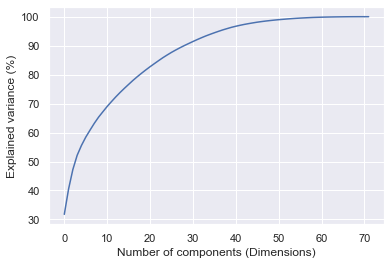

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

* It is noticed that selecting more than 30 components  would explain the variation for more than 90 %. Hence 35 components are selected.

In [54]:
# refitting pca
X_reduced = PCA(n_components=35)
x_reduced_pca=X_reduced.fit_transform(df_pca_applied) 

principalDf_reduced = pd.DataFrame(data = x_reduced_pca)
principalDf_reduced.head(10)

0         1         2         3         4         5         6   \
0   0.076099  4.862396 -0.427807  2.358963  2.874997  0.150238  6.219825   
1   2.826455  4.776148  1.185614  1.962743  4.007203  0.091758  5.015879   
2   6.666168  1.668533  0.030662 -1.381299  2.347860  0.487446  3.865701   
3   7.742572  0.310809  0.846628 -2.774180  2.644921  1.641613  1.033079   
4  -3.621918 -0.074548 -2.723278 -1.580042 -0.385968 -2.120518  1.717143   
5  -3.388142 -0.077214 -2.506927 -0.865102 -0.620576 -1.828369  1.106144   
6  -2.129640  0.906072 -3.169072 -1.074035  0.395126 -2.405937 -0.303895   
7  -2.332456  0.864877 -3.483092 -1.038869 -0.471432 -1.219511  0.807764   
8  10.827667 -4.183950  2.146619 -0.151753 -1.146886 -2.944680  0.439479   
9  11.197144 -3.048018  2.320468 -0.721295  0.030413 -2.663565  0.142648   

         7         8         9         10        11        12        13  \
0  2.401239 -0.705401  0.090571 -0.701988 -1.443254  0.675364 -0.304363   
1  5.485918  0.552099  0.498204  1.382126  0.792225 -0.495239  0.469161   
2  1.512240  1.247385 -0.680704  1.075487  1.760159  1.835847 -0.552647   
3  1.373444  1.654822  0.264458  1.887509  4.238560  2.291240 -4.058443   
4  0.400091 -0.258056 -0.705991 -0.562350 -0.787452 -0.042584 -0.794109   
5  0.515605  0.343992 -0.423132 -0.232153 -0.473228 -0.169060 -1.145560   
6 -0.166639  0.895284  2.039709 -0.881709 -0.157524  1.374752 -0.902206   
7 -1.073234  0.329001  0.256744 -0.429671 -0.495088  0.940698 -0.593183   
8  0.360694 -1.605216  1.763094  2.167859 -1.757419 -1.126169 -1.085288   
9 -0.173795 -2.464078  3.727820  2.733515 -1.224208 -0.867272 -0.268739   

         14        15        16        17        18        19        20  \
0  0.658918  1.130383  1.278435  0.093241  3.066469 -0.690147 -0.839944   
1  2.872697  2.515362  1.175169  1.637707  0.976774  0.624666 -0.186734   
2  1.087496  0.472743  2.418229  1.390658  1.652565 -0.796779 -1.155785   
3  1.533104  1.174652  1.121048  1.614675  1.587117 -0.926898 -2.445980   
4  0.636555  0.339581 -1.241886 -0.074367 -1.805135 -0.107643 -0.386273   
5  0.663612  0.389601 -1.120931  0.205119 -1.810902 -0.266430 -0.329120   
6  0.814926 -0.360854 -0.650594 -0.919743 -1.413642 -0.372641 -1.127993   
7  0.936679  0.638889 -0.551254 -0.458251 -1.576735 -0.067540 -0.685564   
8 -0.108414  1.074244 -1.144527 -2.067003 -1.355011  0.243528  0.514702   
9  0.077052 -0.388412 -0.623323 -2.657091 -0.942901  0.822067  0.204501   

         21        22        23        24        25        26        27  \
0 -0.825184 -0.141889 -0.176353  1.331037  0.010636  1.871674  0.900492   
1 -1.481140  1.426839  0.521997  1.440817 -1.476921  0.081547  0.362586   
2 -2.440083  1.193747 -0.471206  3.543859 -1.427806  0.885752  0.295912   
3 -2.200647  0.855444  0.839531  2.048338 -0.494154  0.312424  0.422939   
4  0.504103 -0.143677  0.266675 -0.031539  0.353311  0.193737 -0.312034   
5  0.557861 -0.020506  0.285584 -0.057531 -0.217718  0.173140 -0.077290   
6  0.525431  0.308285  0.509661 -0.437939 -0.237920  0.657115 -0.190048   
7  0.716475  0.242729  0.292546 -0.132136 -0.576398  0.318377 -0.241241   
8 -0.897889 -0.198956  0.098115 -0.232516  0.951989 -0.369937 -2.414148   
9 -0.224326  0.145425  0.586431  0.344309  0.808607 -0.810624 -1.180148   

         28        29        30        31        32        33        34  
0  0.311116 -1.259473 -1.207928  0.652505  0.740232  0.436075 -0.053611  
1 -0.360475  0.092329 -1.426046  0.564155  0.455654  0.589508 -0.585687  
2 -0.679966  0.839976 -0.894323  0.467791 -0.605964 -1.062390  0.031744  
3 -0.881154 -0.226151  1.138129  0.601522  0.037186  0.538757  0.072553  
4  0.317259  0.034716  0.013919 -0.252391  0.109147  0.479307  0.318651  
5  0.479351  0.021783 -0.153399 -0.366179 -0.042924  0.567075  0.509088  
6  0.786645 -0.170538 -0.174958 -0.378079 -0.018593  0.227960  0.122254  
7  0.973070 -0.194448  0.244181 -0.472627  0.074822  0.568216  0.127861  
8  1.326947 -0.028614 -0.4772

Text(0, 0.5, 'Explained variance (%)')

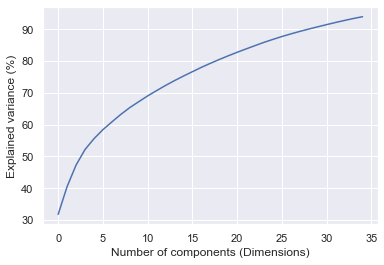

In [55]:
# visualizing with reduced factors
plt.plot(np.cumsum(X_reduced.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

* Hence 35 components of PCA are finalized.

<AxesSubplot:>

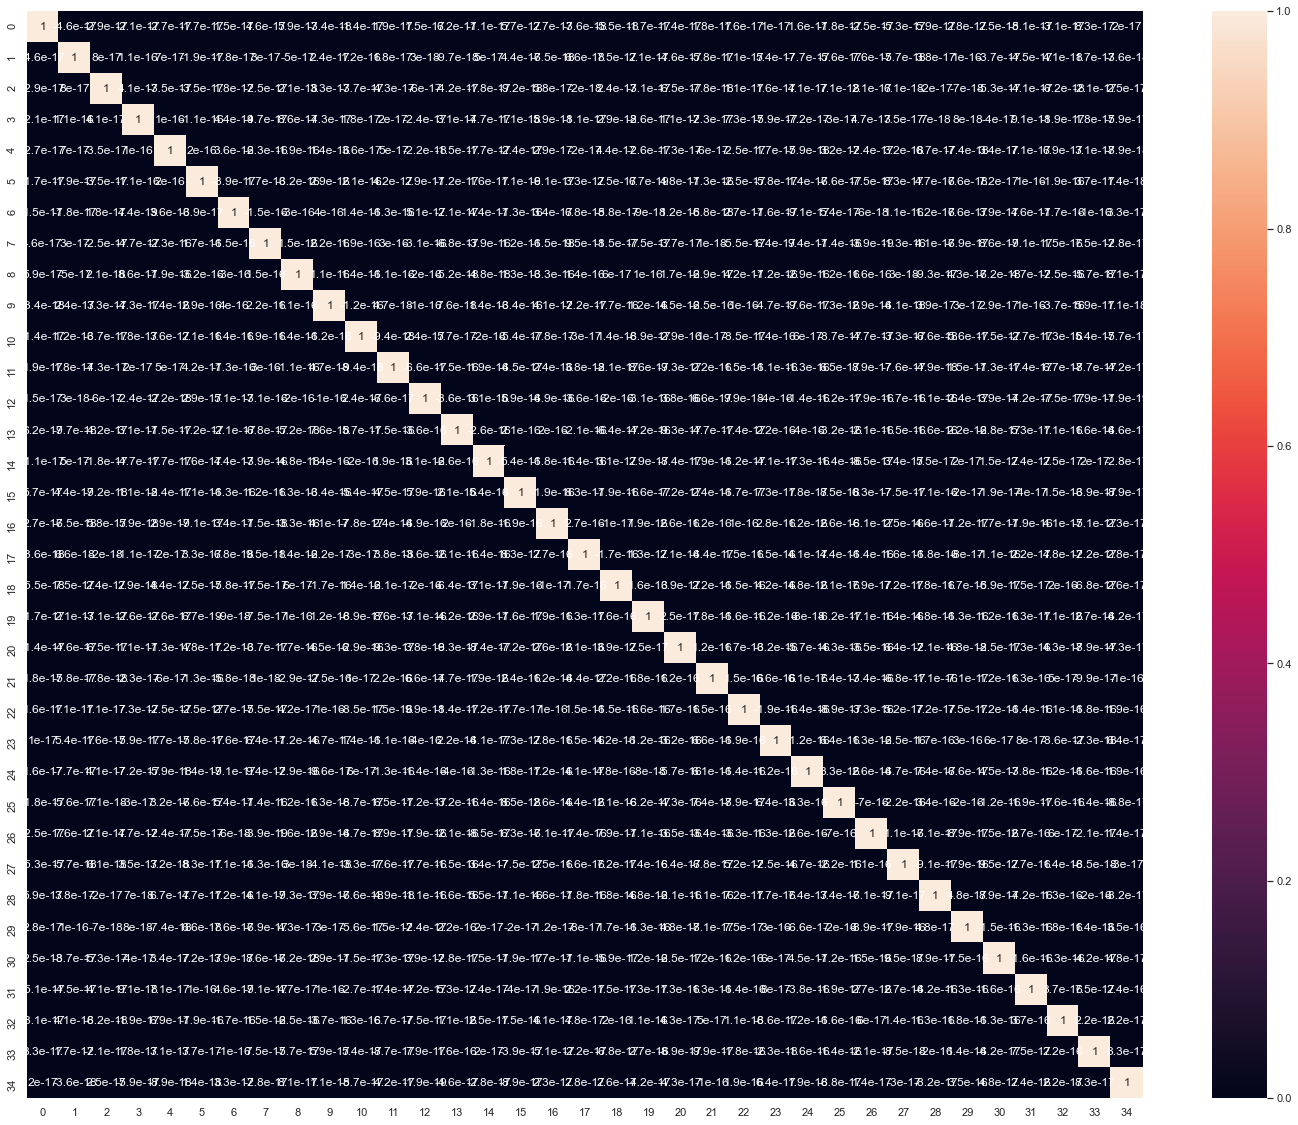

In [56]:
## examining the correlation between pca components
fig = plt.figure(figsize=(25, 20))
sns.heatmap(principalDf_reduced.corr(), annot=True)

* There is no correlation between pca components. Hence these 35 componets are selected as the significant predictors as there is no multicollinearity among them.

In [57]:
## combining the other predictors
merged_df=principalDf_reduced.copy()

merged_df["For Year_2013"]=df_encoded['For Year_2013'].values
merged_df["For Year_2014"]=df_encoded['For Year_2014'].values
merged_df["For Year_2015"]=df_encoded['For Year_2015'].values
merged_df["For Year_2016"]=df_encoded['For Year_2016'].values

In [58]:
merged_df.head()

0         1         2         3         4         5         6  \
0  0.076099  4.862396 -0.427807  2.358963  2.874997  0.150238  6.219825   
1  2.826455  4.776148  1.185614  1.962743  4.007203  0.091758  5.015879   
2  6.666168  1.668533  0.030662 -1.381299  2.347860  0.487446  3.865701   
3  7.742572  0.310809  0.846628 -2.774180  2.644921  1.641613  1.033079   
4 -3.621918 -0.074548 -2.723278 -1.580042 -0.385968 -2.120518  1.717143   

          7         8         9        10        11        12        13  \
0  2.401239 -0.705401  0.090571 -0.701988 -1.443254  0.675364 -0.304363   
1  5.485918  0.552099  0.498204  1.382126  0.792225 -0.495239  0.469161   
2  1.512240  1.247385 -0.680704  1.075487  1.760159  1.835847 -0.552647   
3  1.373444  1.654822  0.264458  1.887509  4.238560  2.291240 -4.058443   
4  0.400091 -0.258056 -0.705991 -0.562350 -0.787452 -0.042584 -0.794109   

         14        15        16        17        18        19        20  \
0  0.658918  1.130383  1.278435  0.093241  3.066469 -0.690147 -0.839944   
1  2.872697  2.515362  1.175169  1.637707  0.976774  0.624666 -0.186734   
2  1.087496  0.472743  2.418229  1.390658  1.652565 -0.796779 -1.155785   
3  1.533104  1.174652  1.121048  1.614675  1.587117 -0.926898 -2.445980   
4  0.636555  0.339581 -1.241886 -0.074367 -1.805135 -0.107643 -0.386273   

         21        22        23        24        25        26        27  \
0 -0.825184 -0.141889 -0.176353  1.331037  0.010636  1.871674  0.900492   
1 -1.481140  1.426839  0.521997  1.440817 -1.476921  0.081547  0.362586   
2 -2.440083  1.193747 -0.471206  3.543859 -1.427806  0.885752  0.295912   
3 -2.200647  0.855444  0.839531  2.048338 -0.494154  0.312424  0.422939   
4  0.504103 -0.143677  0.266675 -0.031539  0.353311  0.193737 -0.312034   

         28        29        30        31        32        33        34  \
0  0.311116 -1.259473 -1.207928  0.652505  0.740232  0.436075 -0.053611   
1 -0.360475  0.092329 -1.426046  0.564155  0.455654  0.589508 -0.585687   
2 -0.679966  0.839976 -0.894323  0.467791 -0.605964 -1.062390  0.031744   
3 -0.881154 -0.226151  1.138129  0.601522  0.037186  0.538757  0.072553   
4  0.317259  0.034716  0.013919 -0.252391  0.109147  0.479307  0.318651   

   For Year_2013  For Year_2014  For Year_2015  For Year_2016  
0              0              0              0              0  
1              1              0              0              0  
2              0              1              0              0  
3              0              0              1              0  
4              0              0              0              0

* Previously created 'For year' encoded columns are combined with PCA components. Ticker symbol variable is not combined as it causes to have many dummy variables in the model. Period Ending variable also not included as that information is already provided by For year variable. 

In [59]:
## Identifyung the columns with missing values 
merged_df.columns[merged_df.isnull().any()]

Index([], dtype='object')

<AxesSubplot:>

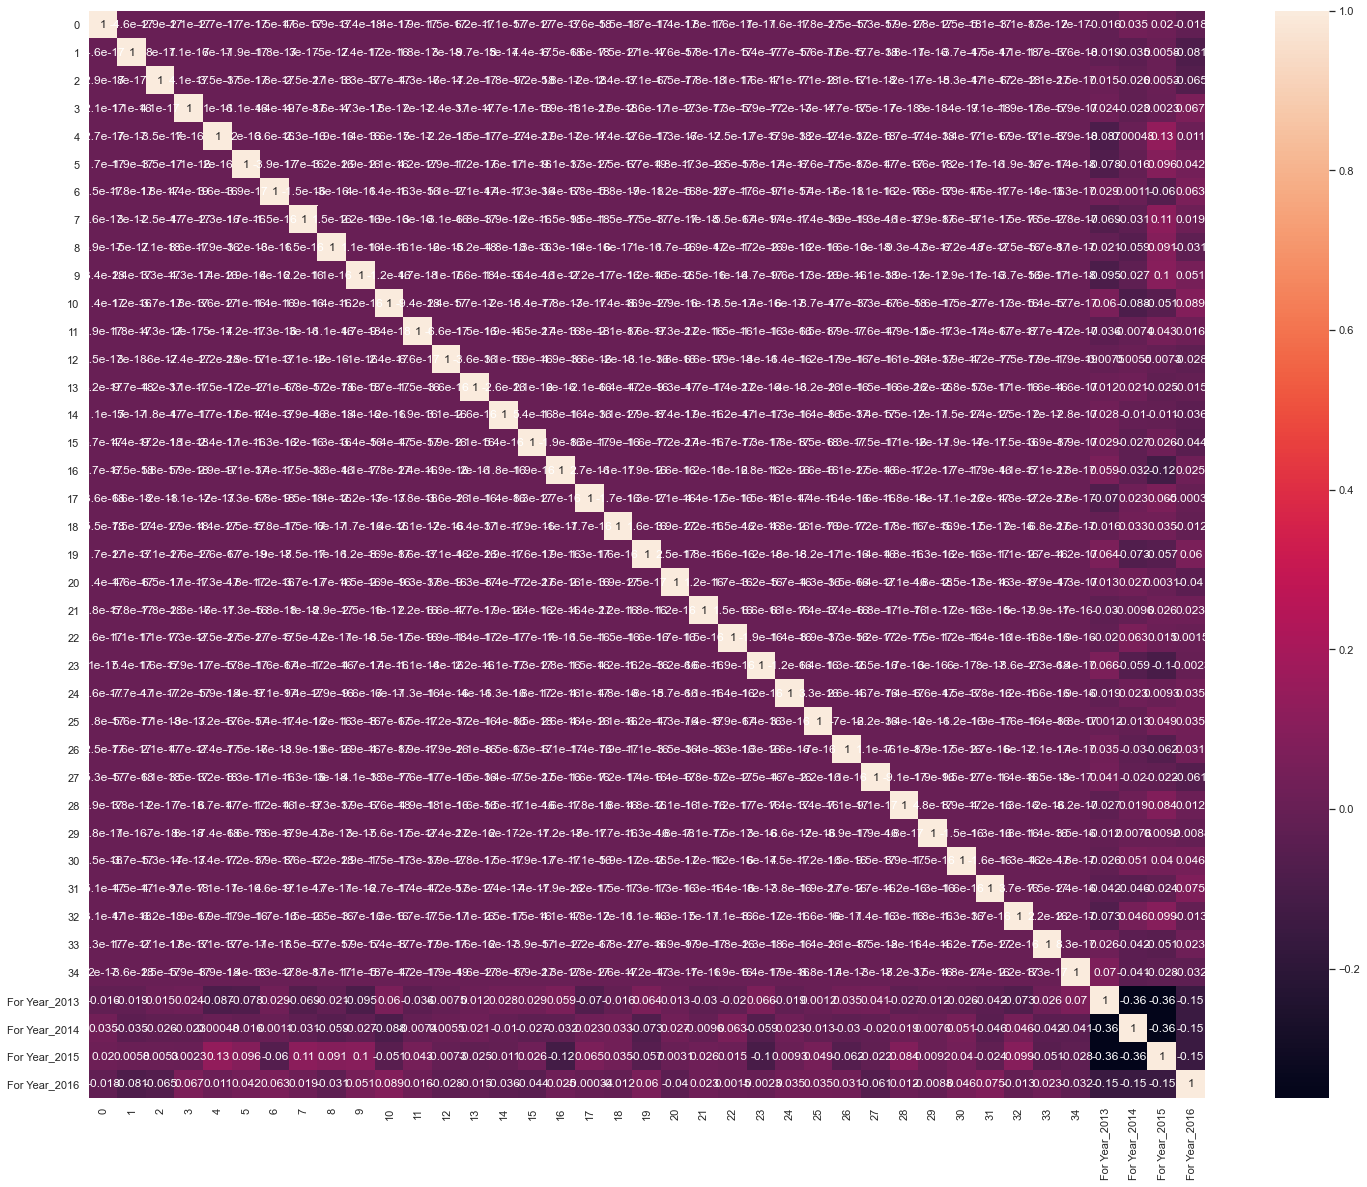

In [60]:
#3 correlation in the combined df
fig = plt.figure(figsize=(25, 20))
sns.heatmap(merged_df.corr(), annot=True)

* Very less corretion exists among the 35 PCA components and the 'For year' coded variable columns. Hence those are considered as the significant predictors to develop a model.

### Model Building

In [61]:
## creating training and test sets

X_train, X_test, y_train, y_test = train_test_split(merged_df, df_encoded['Estimated Shares Outstanding'], test_size=0.20, 
                                                            shuffle=True, random_state=456)


#### Linear model

In [62]:
# k-fold CV (using selected variables)
lm = LinearRegression()
lm.fit(X_train, y_train)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores 

array([0.63681015, 0.71021843, 0.73514225, 0.75019148, 0.76783457,
       0.77755368, 0.71441799, 0.69338197, 0.8142632 , 0.80344946])

In [63]:
# predict 
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)  # r squared value

0.7411299196992335


In [64]:
# MSE 
mse_linear=np.sqrt(mean_squared_error(y_test, y_pred))
mse_linear

0.5313404826246798

####  Ridge

In [65]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of delta 
delta = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(30, 50): 
    ridgeModel = Ridge(alpha = i * 0.9) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X_test, y_test, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    delta.append(i * 0.9) 
  
    ## Loop to print the different values of cross-validation scores 
for i in range(0, len(delta)): 
    print(str(delta[i])+' : '+str(cross_val_scores_ridge[i]))

27.0 : 68.11061951512744
27.900000000000002 : 68.11929270940466
28.8 : 68.12698497452219
29.7 : 68.13374688052905
30.6 : 68.13962559709204
31.5 : 68.14466519601214
32.4 : 68.14890691946603
33.300000000000004 : 68.15238941871662
34.2 : 68.15514896726283
35.1 : 68.15721965176942
36.0 : 68.15863354360276
36.9 : 68.15942085337448
37.800000000000004 : 68.15961007054389
38.7 : 68.15922808983782
39.6 : 68.15830032600239
40.5 : 68.15685081819562
41.4 : 68.15490232515717
42.300000000000004 : 68.15247641214354
43.2 : 68.14959353049322
44.1 : 68.14627309057822


In [66]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 37) 
ridgeModelChosen.fit(X_train, y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score(X_test, y_test))

0.7429561814476744


In [67]:
# predict prices of X_test
y_pred = ridgeModelChosen.predict(X_test)
r3 = sklearn.metrics.r2_score(y_test, y_pred)
print(r3) # R squared value

0.7429561814476744


In [68]:
# MSE
mse_ridge=np.sqrt(mean_squared_error(y_test, y_pred))
mse_ridge

0.5294629302184262

####  Lasso

In [69]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of delta 
delta = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 10): 
    lassoModel = Lasso(alpha = i *0.25) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X_test, y_test, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    delta.append(i * 0.25) 
  
    # Loop to print the different values of cross-validation scores 
for i in range(0, len(delta)): 
    print(str(delta[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 53.63849902150367
0.5 : 51.21806573364411
0.75 : 49.98830610514572
1.0 : 48.25167930944807
1.25 : 46.008185346551166
1.5 : 43.257824216455006
1.75 : 40.0005959191596
2.0 : 36.236500454664935
2.25 : 31.96553782297101


In [70]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 0.25) 
lassoModelChosen.fit(X_train, y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_test, y_test))

0.5773822162710796


In [71]:
y_pred = lassoModelChosen.predict(X_test)
mse_lasso=np.sqrt(mean_squared_error(y_test, y_pred))
mse_lasso

0.6789000814485416

### Comparision of fitted models

* The R squared values and the MSE values are used to evaluate the performance of the fitted models

In [72]:
print('R square')
print("Linear Model", r2)
print("Ridge Model",ridgeModelChosen.score(X_test, y_test))
print("Lasso Model", lassoModelChosen.score(X_test, y_test))

R square
Linear Model 0.7411299196992335
Ridge Model 0.7429561814476744
Lasso Model 0.5773822162710796


* The Ridge model has the highest R squared value. R squared value of the Lasso model is less compared to the values of the other two models

In [73]:
print('Mean Squared Error')
print("Linear Model",mse_linear)
print("Ridge Model",mse_ridge)
print("Lasso Model", mse_lasso)

Mean Squared Error
Linear Model 0.5313404826246798
Ridge Model 0.5294629302184262
Lasso Model 0.6789000814485416


* The Ridge model has the lowest MSE value. MSE of the Lasso model is high compared to the values of the other two models

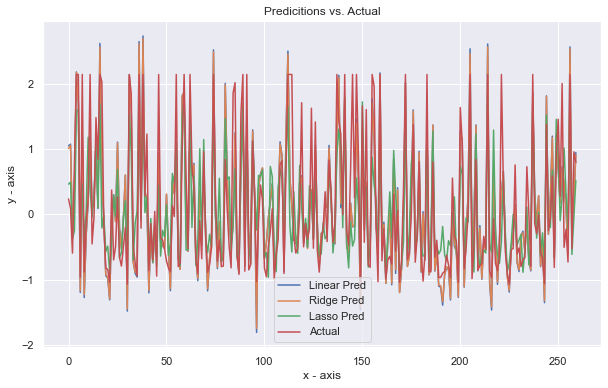

In [74]:
linear_predictions = lm.predict(X_test)
ridge_predictions = ridgeModelChosen.predict(X_test)
lasso_predictions = lassoModelChosen.predict(X_test)

y_test_new = y_test.reset_index()
y_test_new = y_test_new.drop(columns = 'index')

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(linear_predictions, label = "Linear Pred")
plt.plot(ridge_predictions, label = "Ridge Pred")
plt.plot(lasso_predictions, label = "Lasso Pred")
plt.plot(y_test_new, label = "Actual")

plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')

# Set a title of the current axes.
plt.title('Predicitions vs. Actual')

# show a legend on the plot
plt.legend()

# Display a figure.
plt.show()